References 
1. https://medium.com/@chandrikasai9997/imputing-missing-values-is-another-technique-used-to-handle-missing-data-in-a-dataset-824957ce71b4 
 2. https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
 3. https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
 4. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
5. Hands on Machine Learning with Sci-Kit Learn, Keras and Tensor Flow (3rd Edition)
6. https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8
 8. Chatgpt 4o to assist for debugging code. 

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3> Data Sourcing from features_presence540.txt and  aggregateRockData.xlsx</h3>
<p> We have already renamed the columns for the features and label source files and then imported the data. Data description is mentioned below.</p>
<p> 1. We have extracted 480 rows from the features_presence540.txt, and there are 17 columns with none of the features having null values in them.</p>
<p> 2. For the label column "Category Number" we have sourced the data from aggregateRockData source with 14 columns, and none of the columns have null values in them. </p>
<p> 3. We'll be joining features and label in the same dataframe based on RockNumber and Token Number as combination of primary key using inner join and taking data for only 480 Rock Numbers.</p>

In [140]:
df_Features=pd.read_excel("/Users/hoosiersaikap251/Desktop/Sem1/Applied Machine Learning/Homework2/RockMain.xlsx")
df_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RockNumber                  480 non-null    int64  
 1   SubTypeNumber_F             480 non-null    int64  
 2   TokenNumber                 480 non-null    int64  
 3   AngularFragments            480 non-null    float64
 4   RoundedFragments            480 non-null    float64
 5   Straight_Stripes            480 non-null    float64
 6   Curved_Stripes              480 non-null    float64
 7   Physical_Layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily                        480 non-null    float64
 10  Splotchy                    480 non-null    float64
 11  Single_Translucent_Crystal  480 non-null    float64
 12  Multiple_Cubic_Crystals     480 non-null    float64
 13  Sandy_Texture               480 non

In [142]:
df_label=pd.read_excel("/Users/hoosiersaikap251/Desktop/Sem1/Applied Machine Learning/Homework2/aggregateRockData.xlsx")
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RockNumber      540 non-null    int64  
 1   CategoryNumber  540 non-null    int64  
 2   SubtypeNumber   540 non-null    int64  
 3   TokenNumber     540 non-null    int64  
 4   Stimulus        540 non-null    int64  
 5   Figni           540 non-null    int64  
 6   Fmeta           540 non-null    int64  
 7   Fsedi           540 non-null    int64  
 8   Fold            540 non-null    int64  
 9   Fnew            540 non-null    int64  
 10  Pigni           540 non-null    float64
 11  Pmeta           540 non-null    float64
 12  Psedi           540 non-null    float64
 13  POld            540 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 59.2 KB


In [144]:
df_label=df_label.iloc[0:480]

In [38]:
df_Features.head(4)

,RockNumber,SubTypeNumber_F,TokenNumber,AngularFragments,RoundedFragments,Straight_Stripes,Curved_Stripes,Physical_Layers,Veins,Oily,Splotchy,Single_Translucent_Crystal,Multiple_Cubic_Crystals,Sandy_Texture,Fragments,Stripes,Crystals
0,1,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,0.32,0.0,0.00
1,2,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,0.70,0.0,0.05
2,3,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,0.60,0.0,0.00
3,4,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,0.86,0.0,0.00


In [2373]:
df_label.head(4)

,RockNumber,CategoryNumber,SubtypeNumber,TokenNumber,Stimulus,Figni,Fmeta,Fsedi,Fold,Fnew,Pigni,Pmeta,Psedi,POld
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659


In [146]:
df_merged = df_Features.merge(df_label[['RockNumber','CategoryNumber']], on=['RockNumber'], how='inner')
df_merged=df_merged.drop(columns=['Fragments','Stripes','Crystals'])

In [42]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RockNumber                  480 non-null    int64  
 1   SubTypeNumber_F             480 non-null    int64  
 2   TokenNumber                 480 non-null    int64  
 3   AngularFragments            480 non-null    float64
 4   RoundedFragments            480 non-null    float64
 5   Straight_Stripes            480 non-null    float64
 6   Curved_Stripes              480 non-null    float64
 7   Physical_Layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily                        480 non-null    float64
 10  Splotchy                    480 non-null    float64
 11  Single_Translucent_Crystal  480 non-null    float64
 12  Multiple_Cubic_Crystals     480 non-null    float64
 13  Sandy_Texture               480 non

<h2> Question 1> </h2>
<p> For this flow will be like: </p>
<p> Stastical Values/Findings and Visualizations -> Outliers Detection/Treatment -> Skewness Detection/Treatment </p>

<h3> Continous Features</h3>
<p> AngularFragments, RoundedFragments, Straight_Stripes, Physical_Layers, Veins, Oily, Splotchy, Single_Translucent_Crystal, Multiple_Cubic_Crystals, Sandy_Texture</p>

<h3> Categorical Features</h3>
<p> RockNumber, SubTypeNumber_F, TokenNumber</p>

<h3> Statistical Values</h3>

<p> As we can observe in the command below, using describe() we can get to know the statistical values for the dataset. One interesting thing to note here is that all the continous features have low range i.e. [0,1]</p>

<h3> Skewness</h3>

<p> We've plotted histograms to show the data distribution of the features and we can clearly observe for most of the features the distribution is right skewed. For example Physical Layers, Veins, Splotchy, Sandy Texture, Oily, Angular Fragments and Rounded Fragments. This means most of the data points are clustered to left side (or lower values) (Mean>Median) </p>

<h3> Any Special Treatment Required?</h3>
<p> Yes, we need to fix the skewness of these features, and scale the features as well before feeding the data into model. We'll be performing <i><b>log transformation</b></i> in order to treat skewness and <i><b>MinMaxScaling</b></i> to fix the scale</p>


In [2379]:
df_merged.describe()

,RockNumber,SubTypeNumber_F,TokenNumber,AngularFragments,RoundedFragments,Straight_Stripes,Curved_Stripes,Physical_Layers,Veins,Oily,Splotchy,Single_Translucent_Crystal,Multiple_Cubic_Crystals,Sandy_Texture,CategoryNumber
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,240.500000,15.500000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854,2.000000
std,138.708327,8.664472,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149,0.817348
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,120.750000,8.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,240.500000,15.500000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,2.000000
75%,360.250000,23.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000,3.000000
max,480.000000,30.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000,3.000000


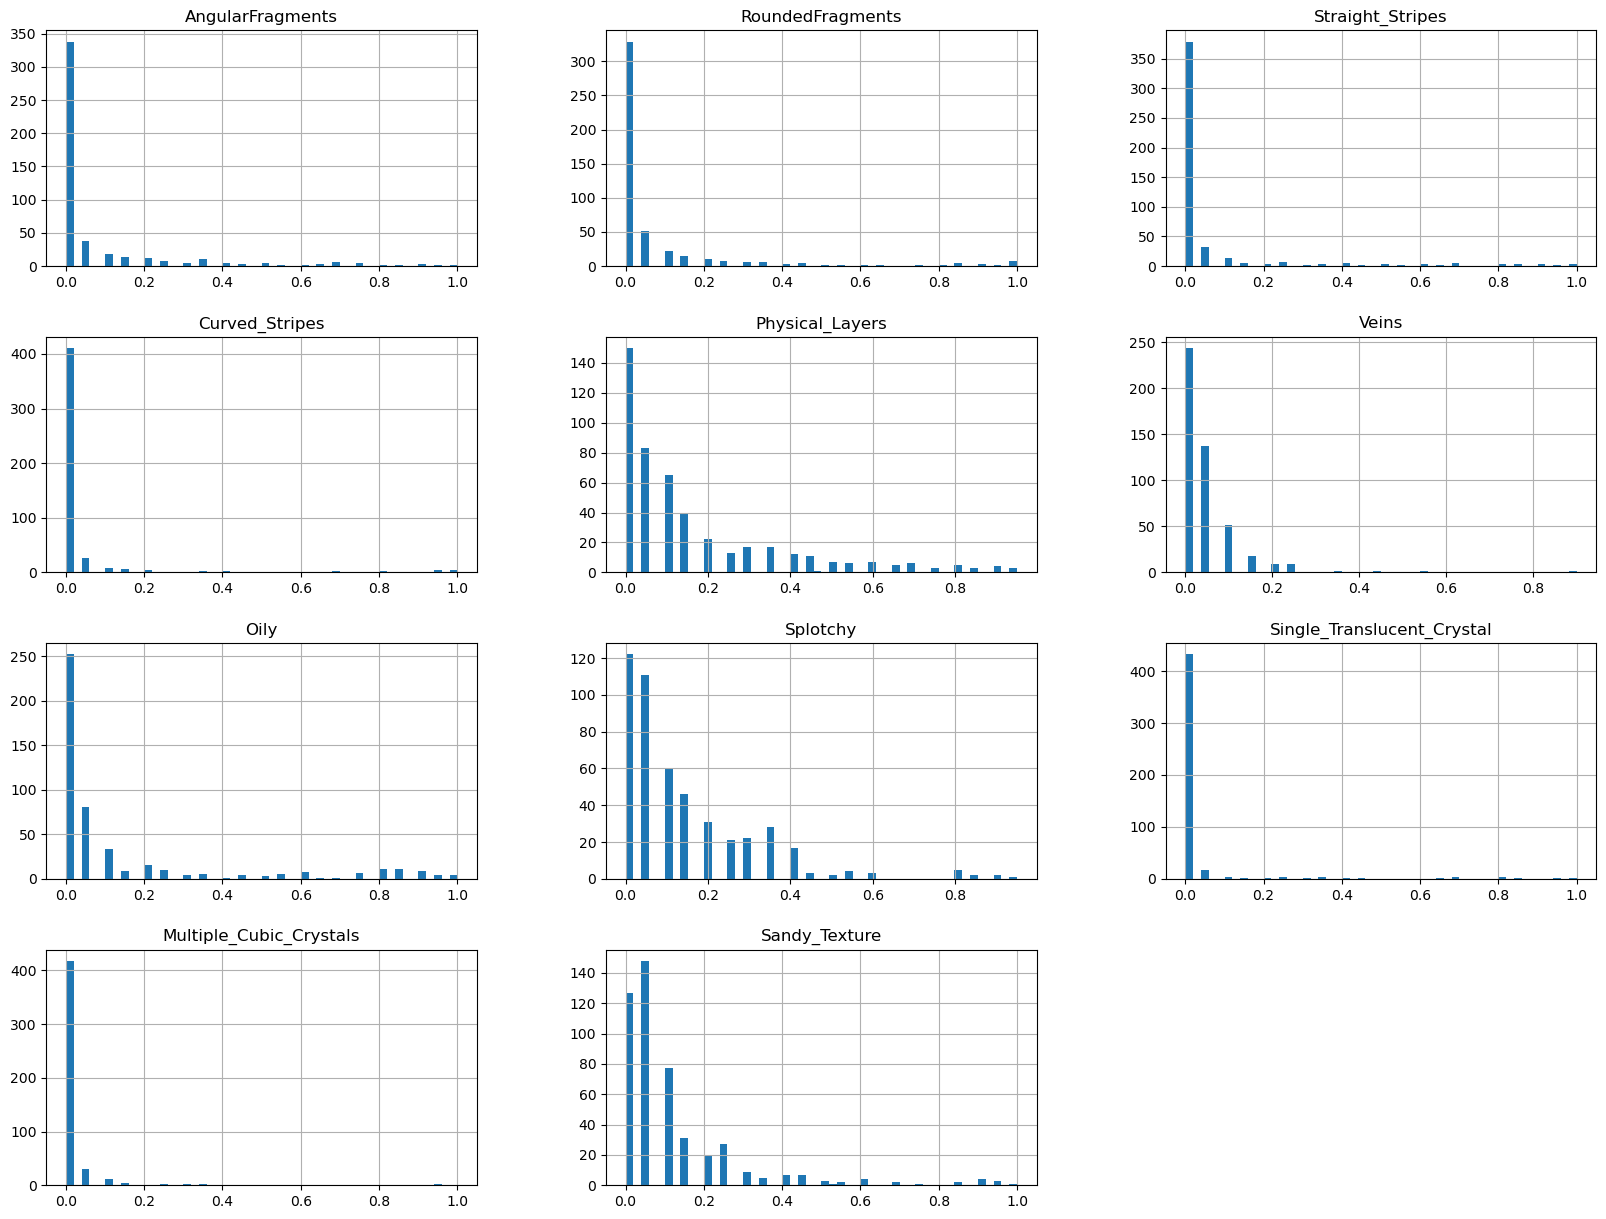

In [2381]:
li=['CategoryNumber','TokenNumber','RockNumber','SubTypeNumber_F']
df_merged.drop(columns=li).hist(bins=50, figsize=(20,15))
mp.show()

<h3> Outlier Detection </h3>
<p>Here, we are checking if for all the Numerical Columns is there any outlier? If yes, then treating them using Log Transformation method.</p>
<h3> Some findings while detecting outliers</h3>
<p>1. For this dataset the features range is [0,1] and for values that are already close to 1 or 0, log transformations will not make much difference. </p>
<p> 2. We tried using sqrt and cuberoot transformation as well but outliers were still showing up.</p>
<p> 3. In such cases, these “outliers” might be expected and represent actual behavior of the data.</p>
<p> 4. Used capping as well but later on found that it was impacting scaling and model prediction results.</p>

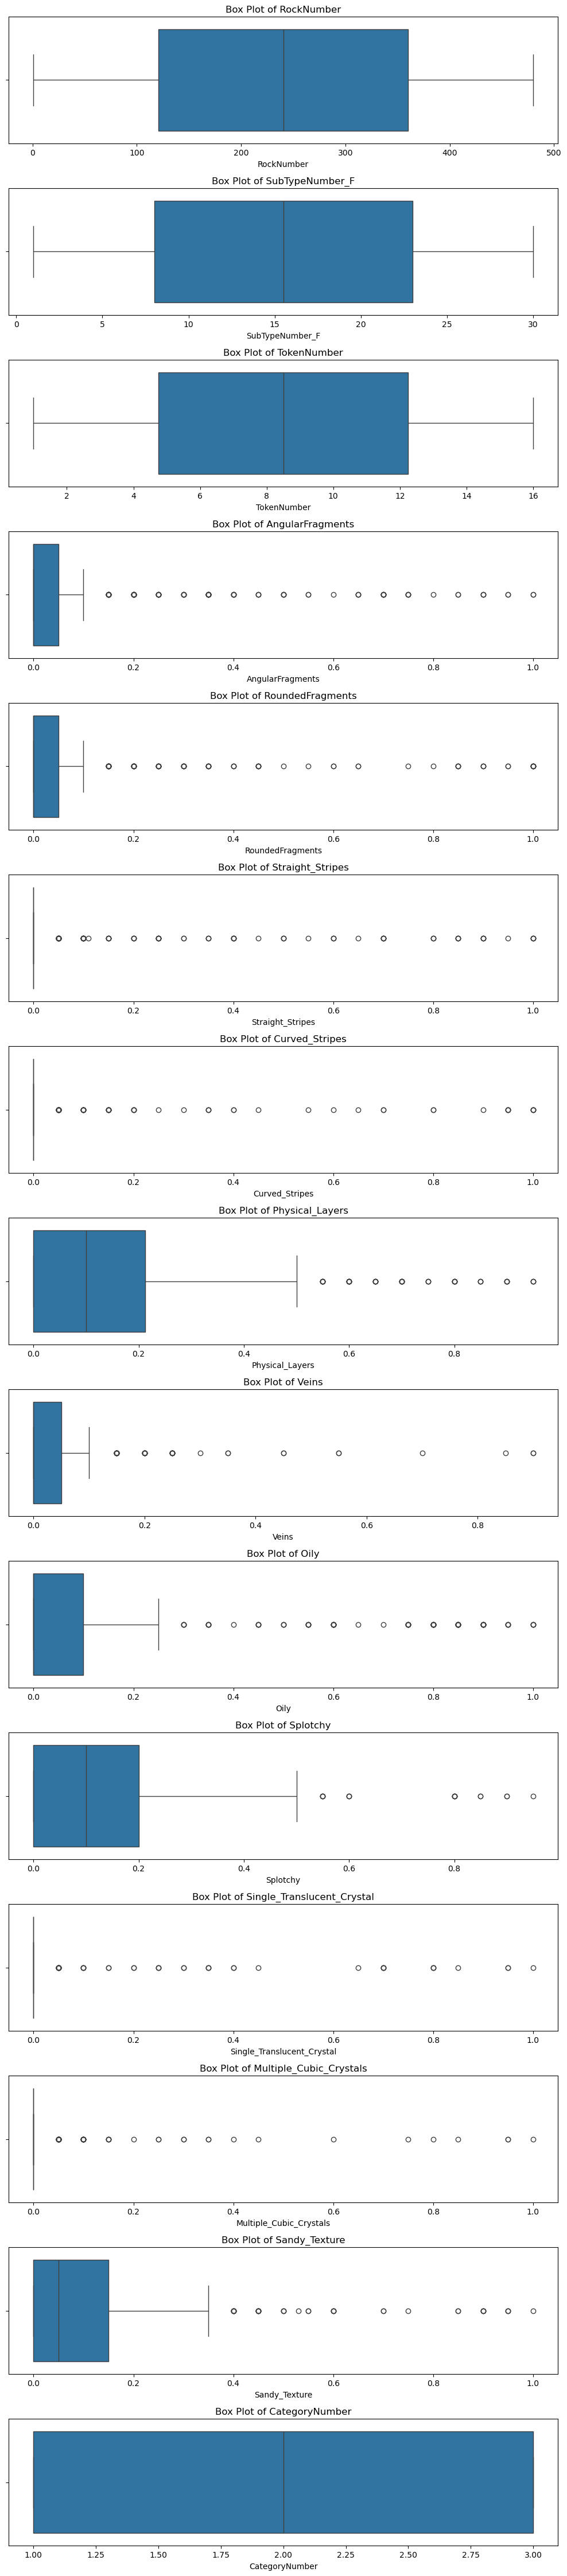

In [1823]:
numerical_cols = df_merged.select_dtypes(include=['number']).columns

num_cols = len(numerical_cols)
fig, axes = mp.subplots(nrows=num_cols, ncols=1, figsize=(10, num_cols * 3))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_merged[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

mp.tight_layout()
mp.show()

In [2397]:
def log_trf(x):
    if x==0:
        
        return x
    return np.log(x)

Outliers=['AngularFragments','RoundedFragments','Straight_Stripes','Curved_Stripes','Physical_Layers','Veins','Splotchy','Single_Translucent_Crystal','Multiple_Cubic_Crystals','Sandy_Texture']
df_log_transformed = df_merged.copy()
df_log_transformed[col] = df_log_transformed[col].apply(lambda x: log_trf(x))

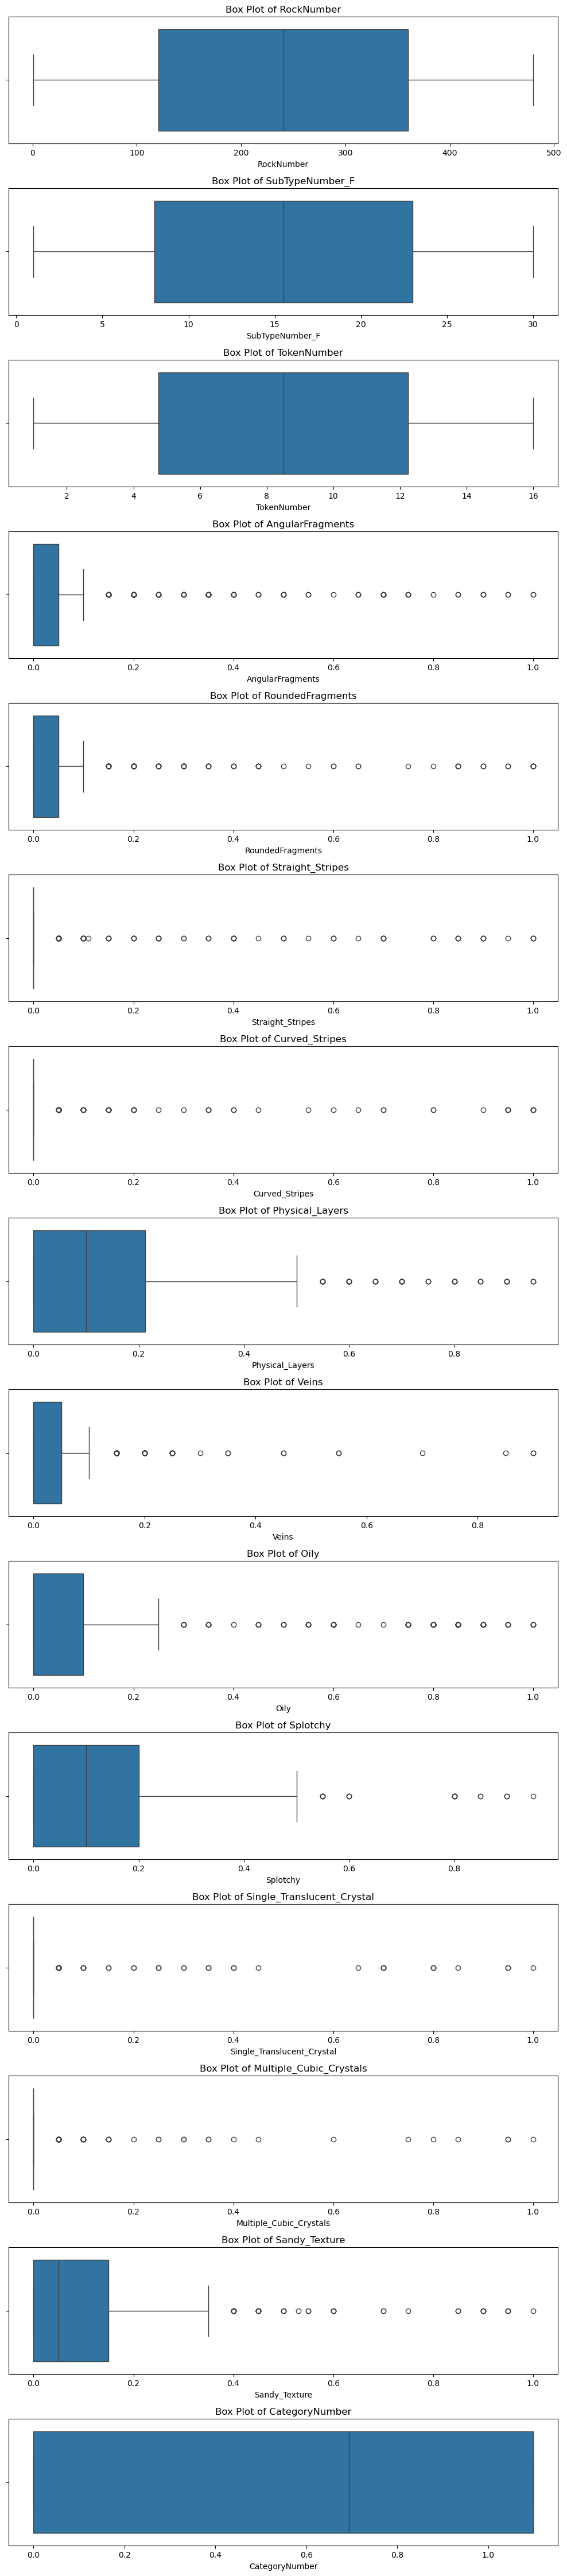

In [2399]:
numerical_cols = df_log_transformed.select_dtypes(include=['number']).columns

num_cols = len(numerical_cols)
fig, axes = mp.subplots(nrows=num_cols, ncols=1, figsize=(10, num_cols * 3))


for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_log_transformed[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

mp.tight_layout()
mp.show()

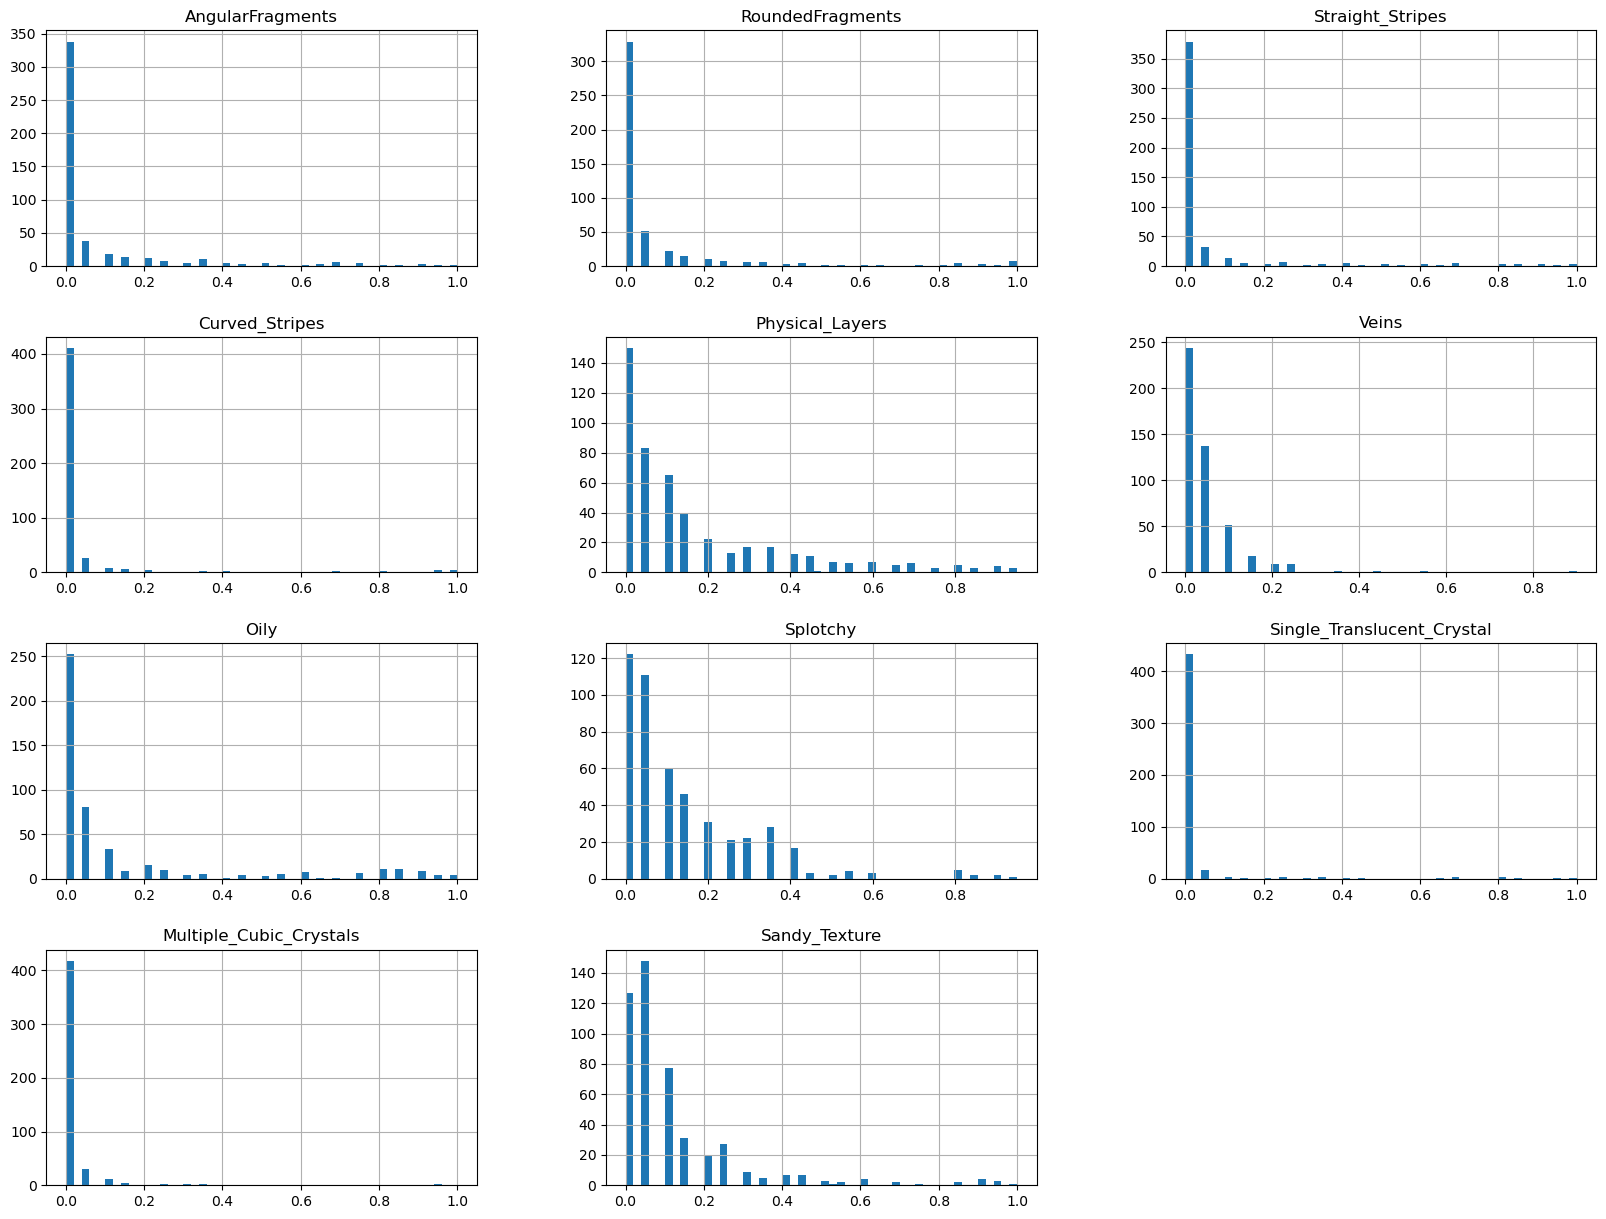

In [2401]:
li=['CategoryNumber','TokenNumber','RockNumber','SubTypeNumber_F']
df_merged.drop(columns=li).hist(bins=50, figsize=(20,15))
mp.show()

<h3> Treating skewness using Log Transformation </h3>

In [44]:
def log_trf(x):
    if x==0:
        
        return x
    return np.log(x)

li = [
    'AngularFragments', 'RoundedFragments', 'Straight_Stripes', 
    'Curved_Stripes', 'Physical_Layers', 'Veins', 'Oily', 
    'Splotchy', 'Single_Translucent_Crystal', 'Multiple_Cubic_Crystals', 
    'Sandy_Texture'
]
for col in li:

    df_log_transformed = df_merged.copy()
    df_log_transformed[col] = df_log_transformed[col].apply(lambda x: log_trf(x))

In [2406]:
df_log_transformed.describe()

,RockNumber,SubTypeNumber_F,TokenNumber,AngularFragments,RoundedFragments,Straight_Stripes,Curved_Stripes,Physical_Layers,Veins,Oily,Splotchy,Single_Translucent_Crystal,Multiple_Cubic_Crystals,Sandy_Texture,CategoryNumber
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,240.500000,15.500000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,-1.632147,2.000000
std,138.708327,8.664472,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,1.211810,0.817348
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.995732,1.000000
25%,120.750000,8.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.995732,1.000000
50%,240.500000,15.500000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,-1.897120,2.000000
75%,360.250000,23.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.000000,3.000000
max,480.000000,30.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,0.000000,3.000000


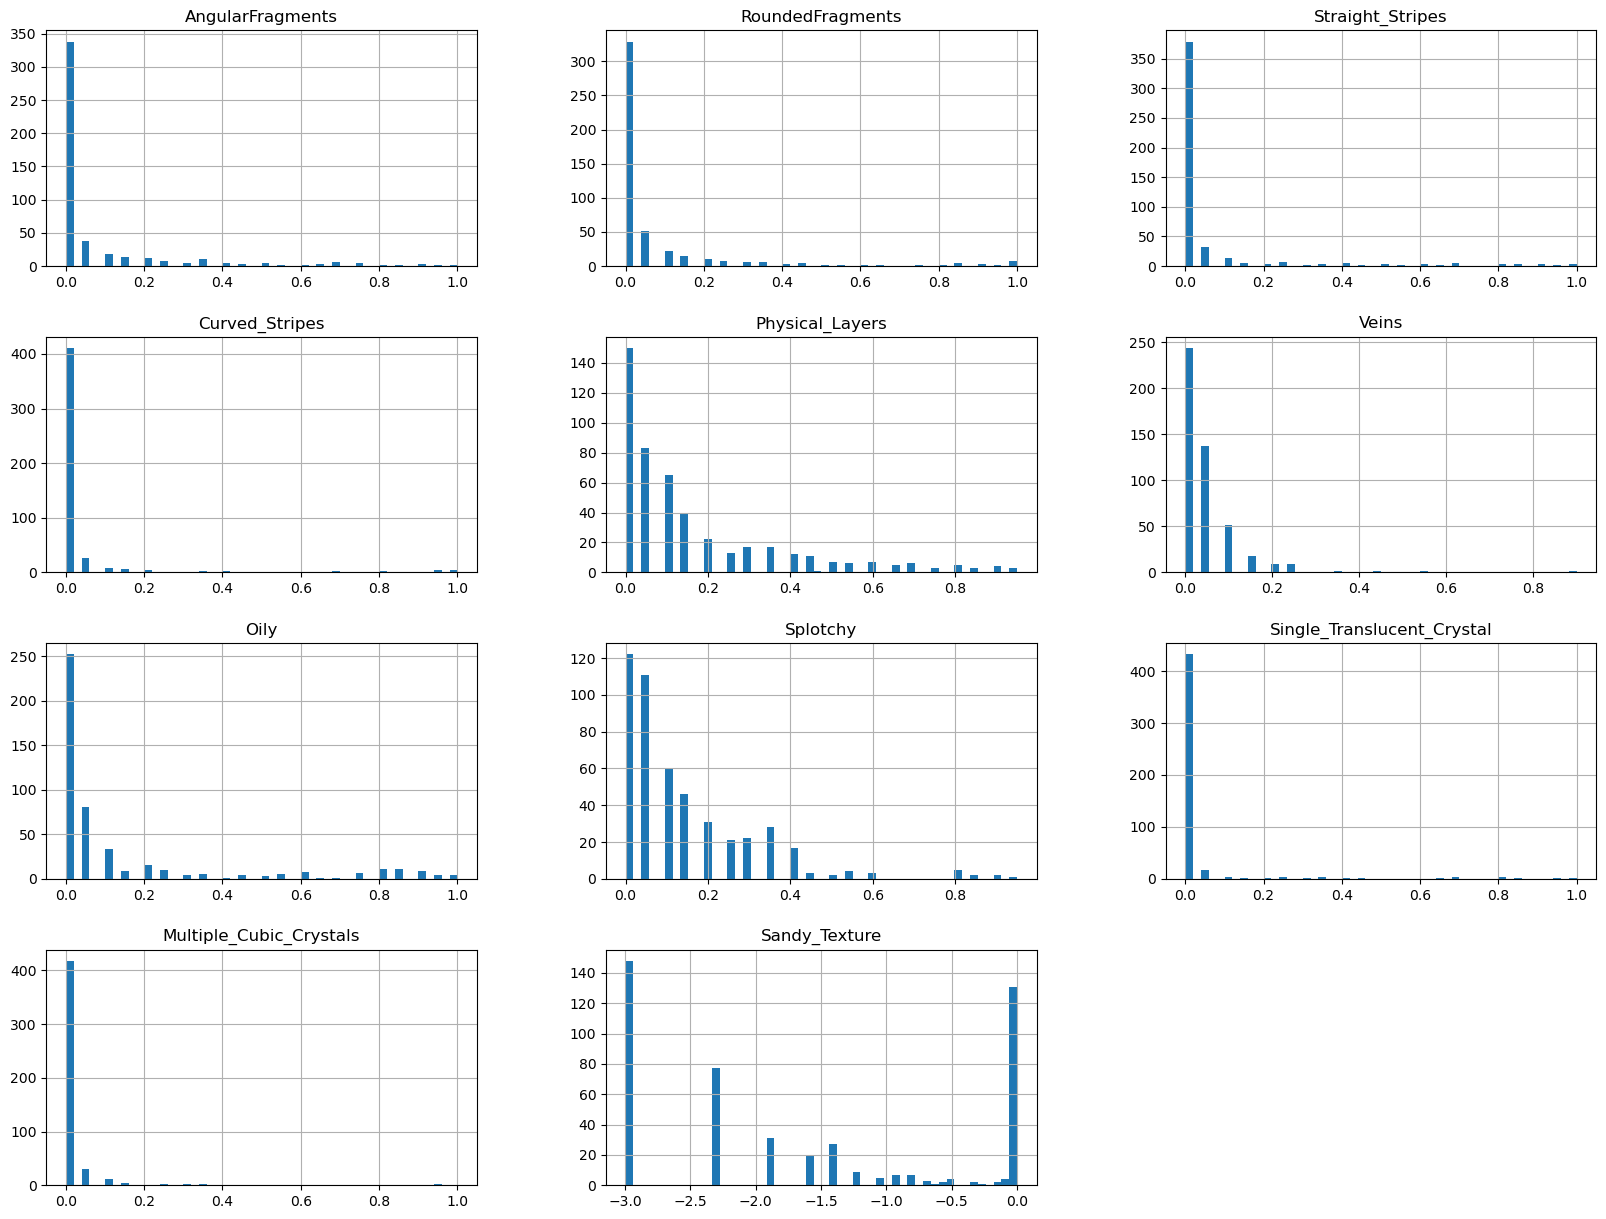

In [2408]:
li=['CategoryNumber','TokenNumber','RockNumber','SubTypeNumber_F']
df_log_transformed.drop(columns=li).hist(bins=50, figsize=(20,15))
mp.show()

<h2>Question 2> </h2>
<p> From the Correlation matrix we can analyze the values for correlation among the different features in the dataset. Here are the inferences that we can take forward.</p>

<h2>Positive Corr</h2>
<p> (a) For Target variable (Category Number) we can see how different features are correlated (Postive and Negative Corr. both). <i><b>Physical Layers, Single_Translucent_Crystal,Sandy_Texture,Veins,Multiple_Cubic_Crystals have comparitively strong positive correlation </b></i>.<i><b> Positive Corr (if X goes up then Y goes up or X goes down and Y goes down) and Upward Trend for these features with the Target Variable Category Number</b></i> </p>

<h2>Negative Corr</h2>
<p> (b) From the Corr matrix, it can be observed that we have neg corr as well, <i><b> Splotchy, AngularFragments, Curved_Stripes</b></i> have negative correlation with the Target Variable Category Number(X goes up Y goes downor X goes down Y goes up) and it has downward trend</p>

In [97]:
li=['RockNumber','SubTypeNumber_F','TokenNumber']
corr_df=df_log_transformed.drop(columns=li)
corr_matrix=corr_df.corr()
sort_corr = corr_matrix.abs().sort_values(by=corr_matrix.columns[11], axis=0)
sort_corr = sort_corr[sort_corr.index]

<Axes: >

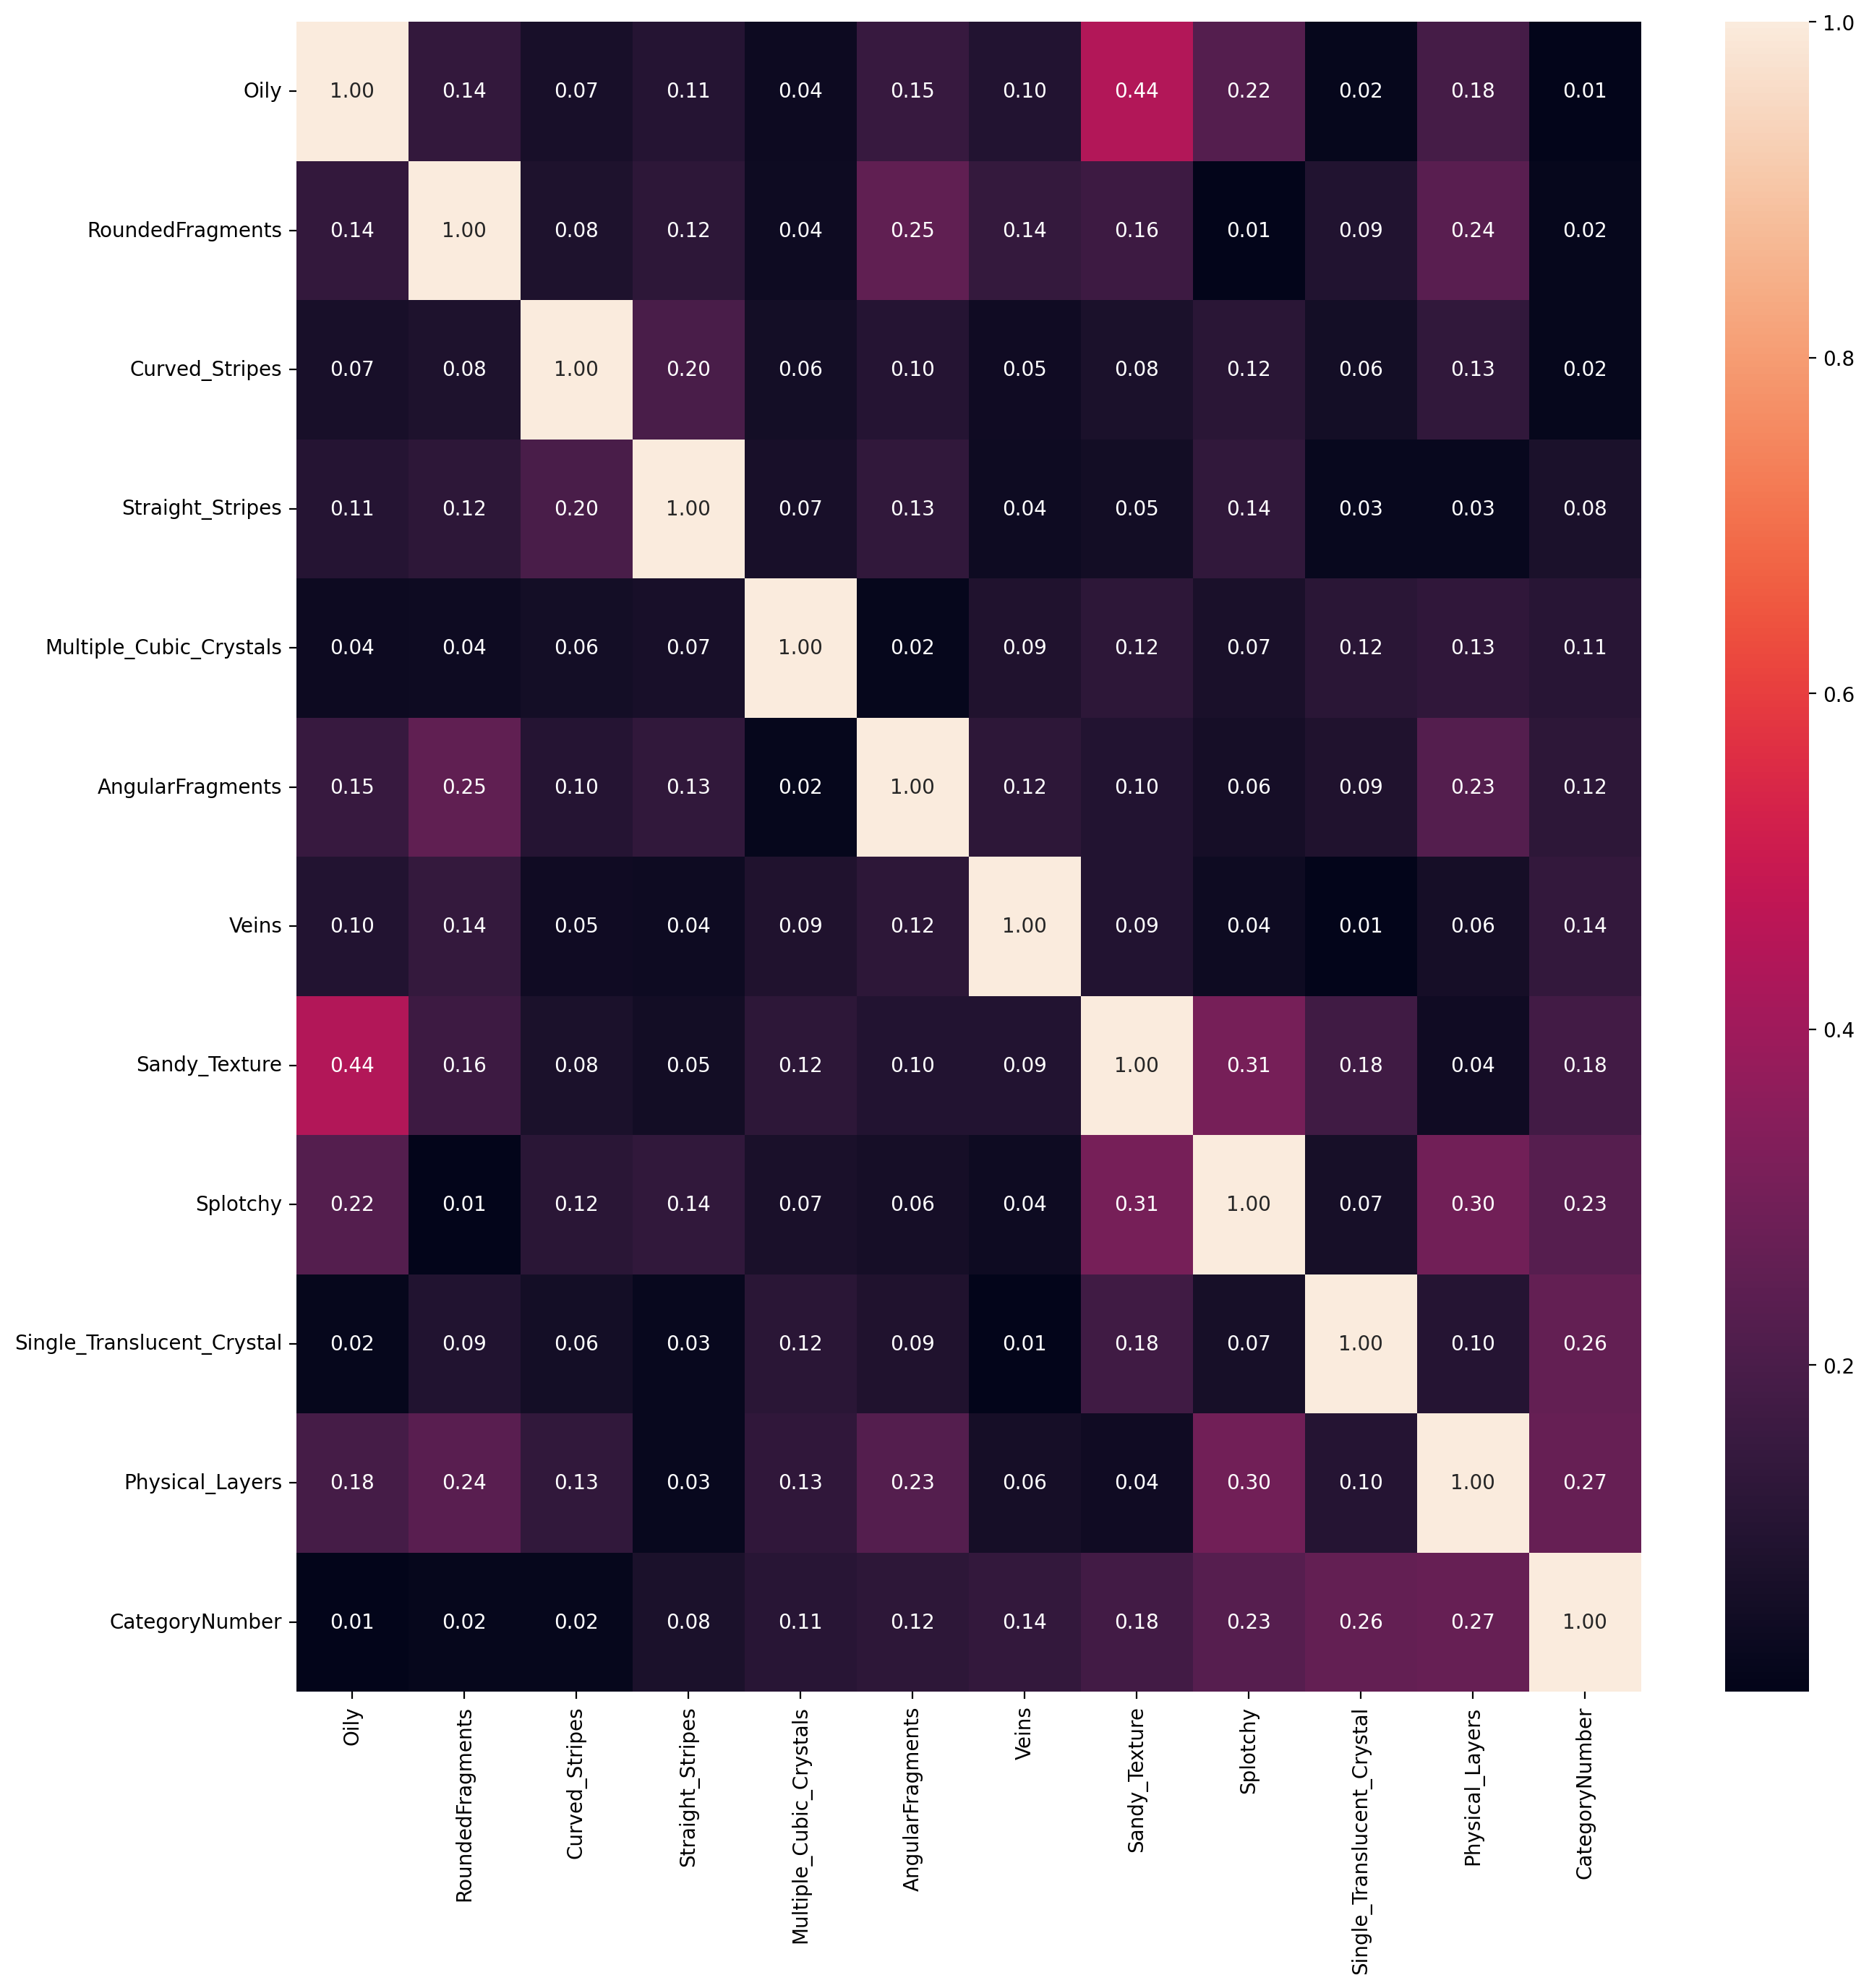

In [99]:
fig = mp.figure(figsize=(15,15), dpi = 200)
sns.heatmap(sorted_corr, annot = True, fmt = '.2f')

In [2416]:
corr_matrix['CategoryNumber'].sort_values(ascending=False)

CategoryNumber                1.000000
Physical_Layers               0.266699
Single_Translucent_Crystal    0.258910
Sandy_Texture                 0.179933
Veins                         0.140553
Multiple_Cubic_Crystals       0.113872
Straight_Stripes              0.077495
RoundedFragments              0.017446
Oily                          0.008172
Curved_Stripes               -0.017454
AngularFragments             -0.122447
Splotchy                     -0.229273
Name: CategoryNumber, dtype: float64

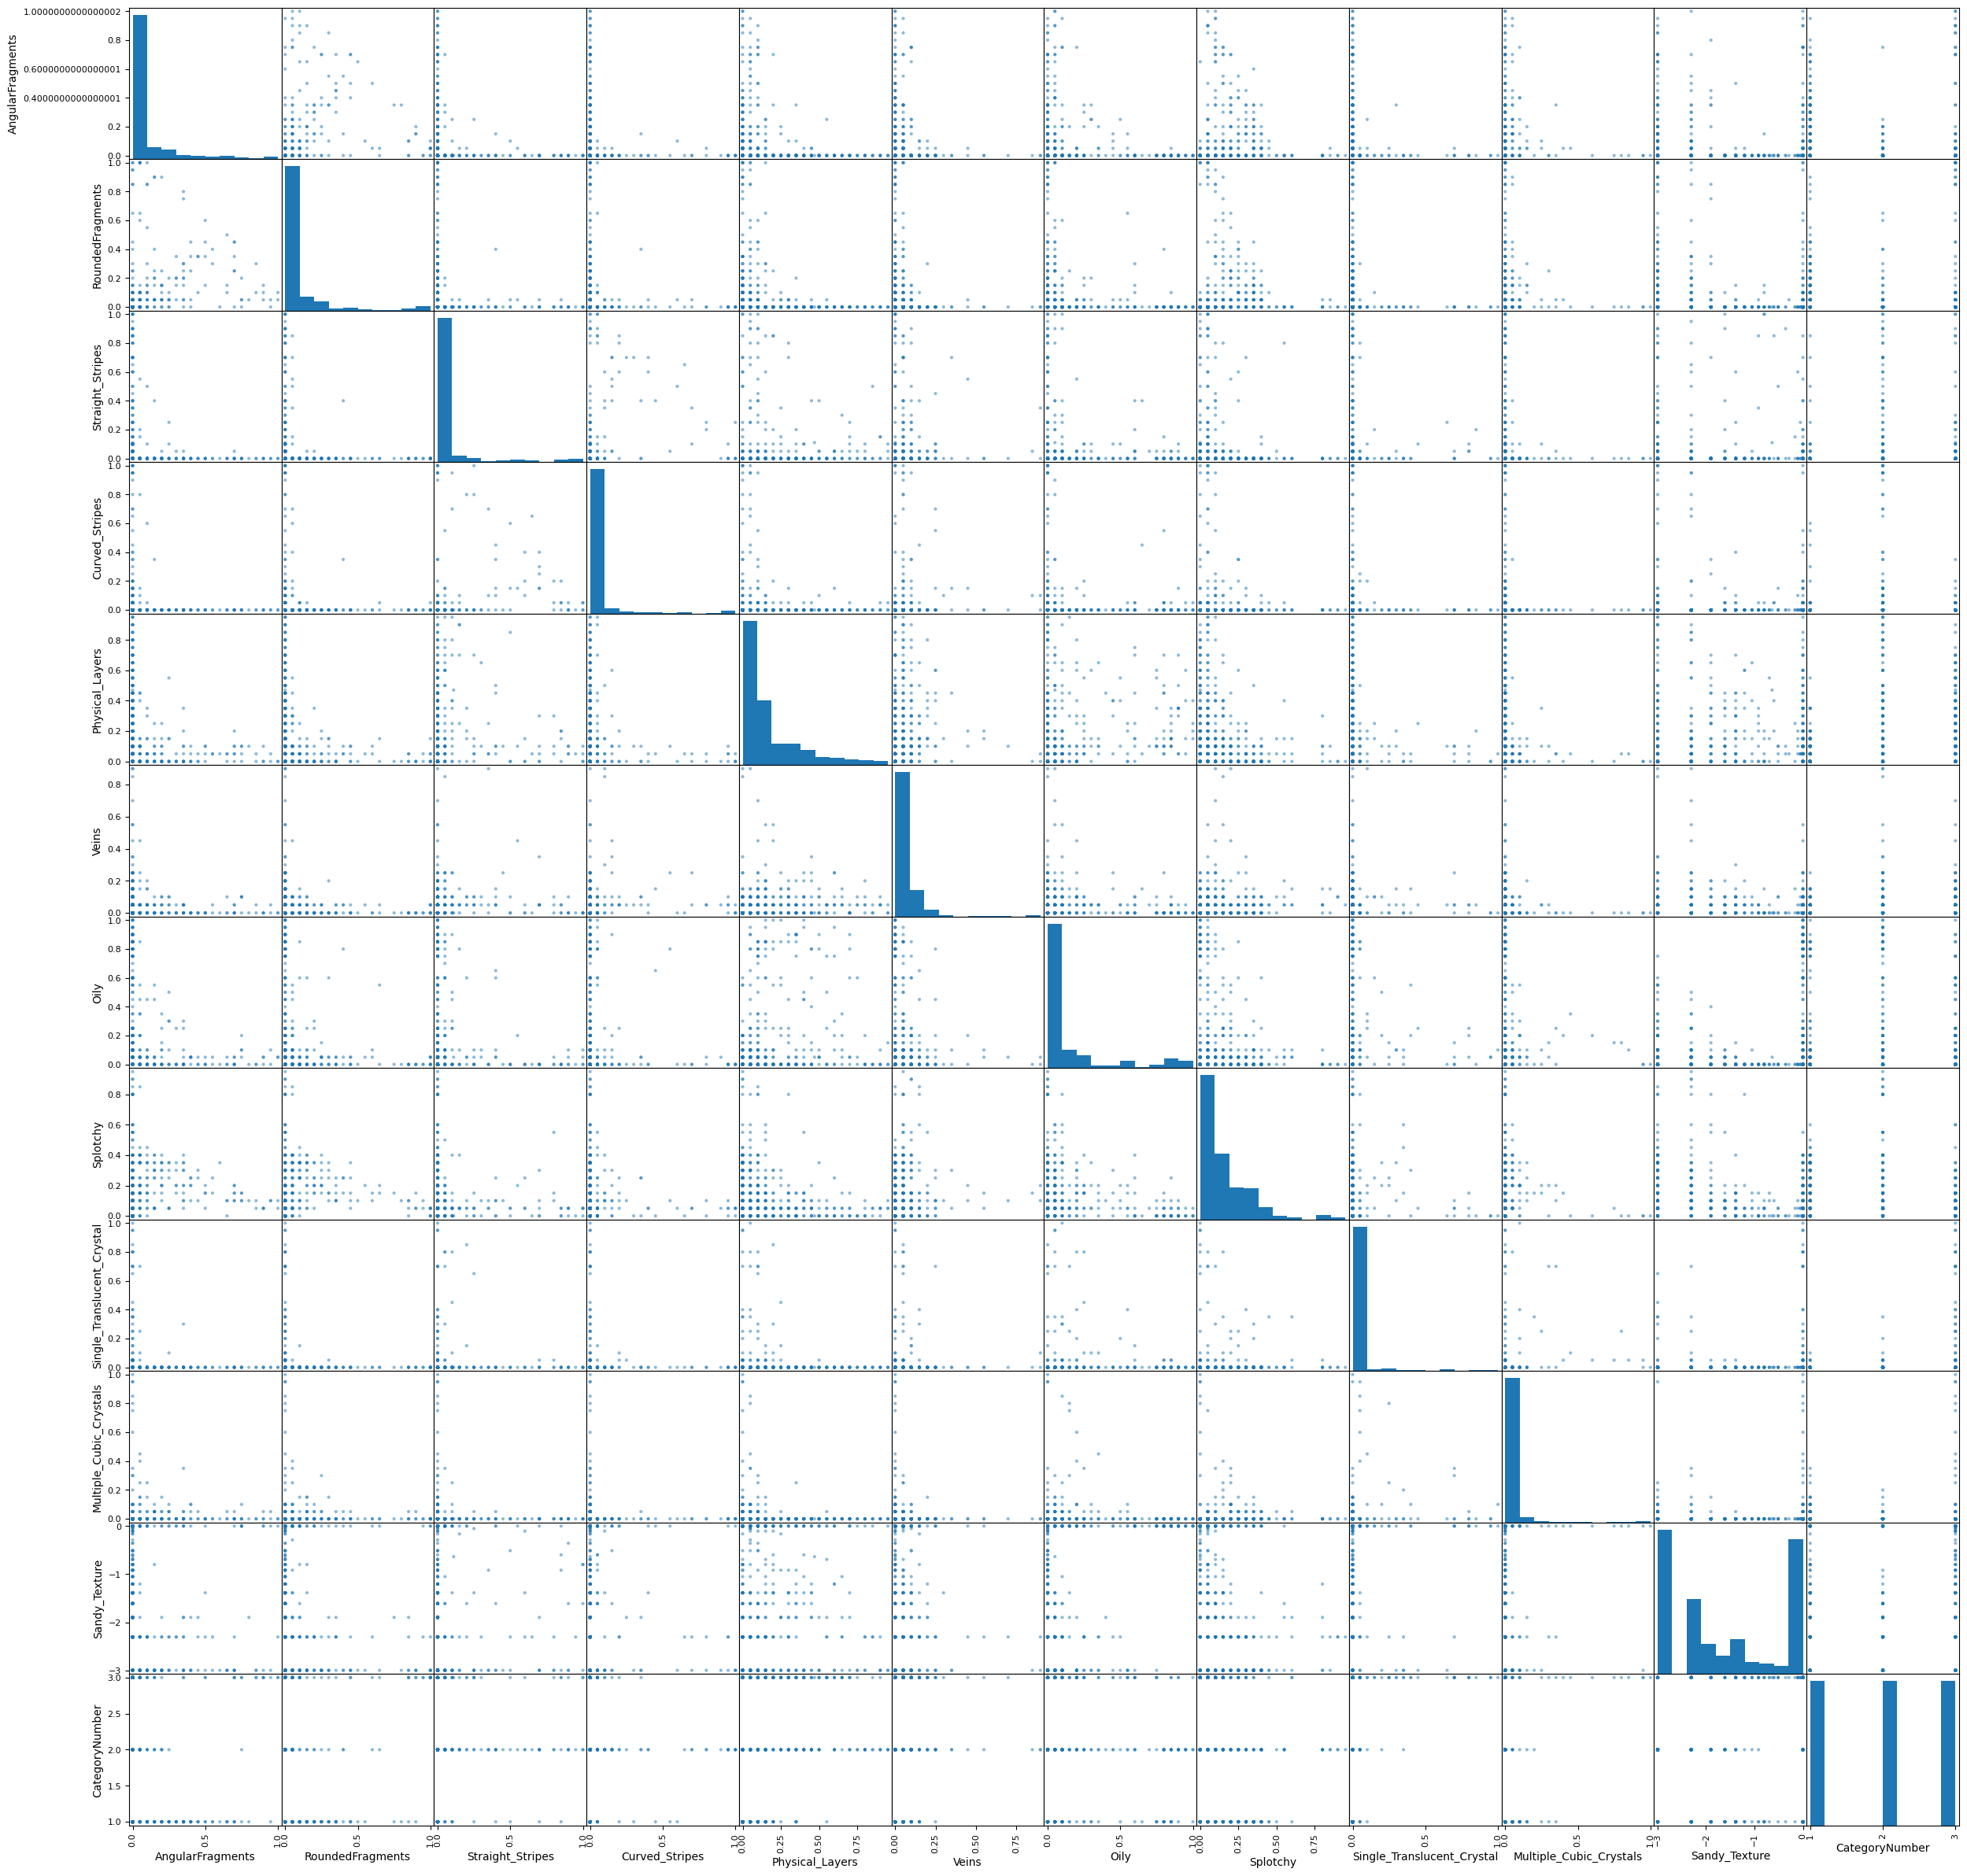

In [2418]:
scatter_matrix(frame=corr_df, figsize=(30, 30))
mp.show()

<h2>Question 3></h2>

In [148]:
train_df_NS=df_log_transformed[(df_log_transformed['TokenNumber']>=1)& (df_log_transformed['TokenNumber']<=10)]
val_df_NS=df_log_transformed[(df_log_transformed['TokenNumber']>=11)& (df_log_transformed['TokenNumber']<=13)]
test_df_NS=df_merged[(df_log_transformed['TokenNumber']>=14)& (df_log_transformed['TokenNumber']<=16)]

<h3> Scaling the features using MinMax Scaler </h3>

In [61]:
train_df=train_df_NS.copy()
Scaled_Columns = [
    'AngularFragments', 'RoundedFragments', 'Straight_Stripes', 'Curved_Stripes',
    'Physical_Layers', 'Veins', 'Oily', 'Splotchy', 'Single_Translucent_Crystal',
    'Multiple_Cubic_Crystals', 'Sandy_Texture'
]

scaler = MinMaxScaler()
train_df[Scaled_Columns] = scaler.fit_transform(train_df[Scaled_Columns])


In [63]:
val_df=val_df_NS.copy()
Scaled_Columns = [
    'AngularFragments', 'RoundedFragments', 'Straight_Stripes', 'Curved_Stripes',
    'Physical_Layers', 'Veins', 'Oily', 'Splotchy', 'Single_Translucent_Crystal',
    'Multiple_Cubic_Crystals', 'Sandy_Texture'
]

scaler = MinMaxScaler()
val_df[Scaled_Columns] = scaler.fit_transform(val_df[Scaled_Columns])


In [65]:
test_df=test_df_NS.copy()
Scaled_Columns = [
    'AngularFragments', 'RoundedFragments', 'Straight_Stripes', 'Curved_Stripes',
    'Physical_Layers', 'Veins', 'Oily', 'Splotchy', 'Single_Translucent_Crystal',
    'Multiple_Cubic_Crystals', 'Sandy_Texture'
]

scaler = MinMaxScaler()
test_df[Scaled_Columns] = scaler.fit_transform(test_df[Scaled_Columns])


In [67]:
train_df=train_df.drop(columns={'RockNumber','SubTypeNumber_F','TokenNumber'})
val_df=val_df.drop(columns={'RockNumber','SubTypeNumber_F','TokenNumber'})
test_df=test_df.drop(columns={'RockNumber','SubTypeNumber_F','TokenNumber'})

<h2>Question 4></h2>

<h3> 4 (b)</h3>

<h3> Linear SVC</h3>
<p> On the training dataset we have tested different values of Hyp C and calculated Precision, Recall, F1Score along with Model Accuracy.</p>

<h3> Observation on Train Dataset</h3>
<p> It can be observed that when C=10, then we are getting max score out of all the other C values. For easy to remember convention we can think like this <b><i> C is inversely proportional to Street Wide i.e. More the C value, more strict is the decision boundary and hence less violations and vice-versa </i></b></p>

<h3> Confusion Matrix</h3>
<p> We'hve created two confusion matrix for better understanding the impact of C values and violations across each category</p>

<h3> Score on Val Dataset</h3>
<p> When we use the best param from Train Dataset on Val Dataset, the score has increased to 70% indicating that our model is able to generalise well on the val dataset.</p>

<h3> Score on Test Dataset</h3>
<p> After doing grid search using predefined split and getting the best hyp param for testing the data, we passed these param to test the data, and it have an Accuracy of 71%, which means it is able to categorise well on Test Data as well.</p>

In [2647]:
C_values = [0.1,1, 10, 100]
X=train_df.drop('CategoryNumber',axis=1).values
y=train_df['CategoryNumber'].values
accuracies = []
precisions = []
recalls = []
f1_scores = []

for C in C_values:
    
    svm_clf = make_pipeline(LinearSVC(C=C, random_state=21))
    
    svm_clf.fit(X, y)
    
    y_pred = svm_clf.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.6366666666666667, 0.6533333333333333, 0.6733333333333333, 0.6666666666666666]
Precisions: [0.6368111629124077, 0.653547269620579, 0.6737324410683065, 0.6668851149600896]
Recalls: [0.6366666666666667, 0.6533333333333333, 0.6733333333333333, 0.6666666666666666]
F1 Scores: [0.636601767143639, 0.6530923456641861, 0.6729923207080568, 0.6662117473973145]


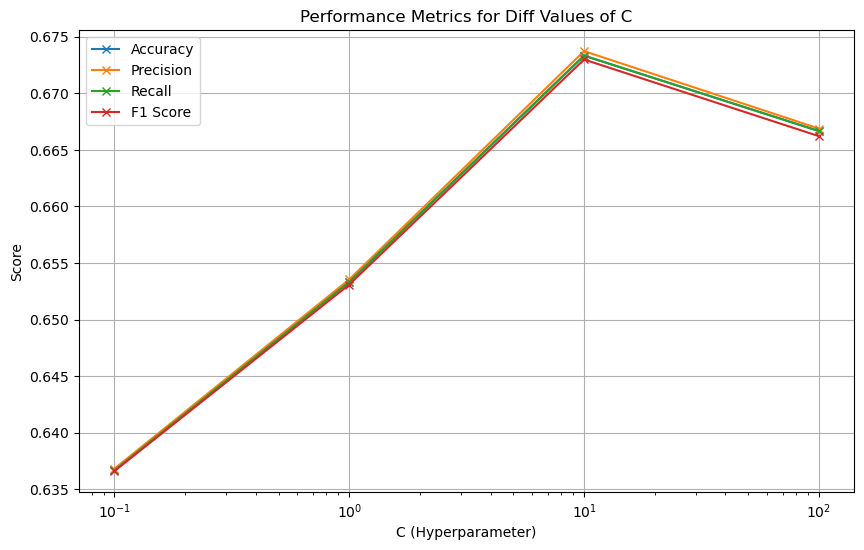

In [2649]:
mp.figure(figsize=(10, 6))
mp.plot(C_values, accuracies, label='Accuracy', marker='x')
mp.plot(C_values, precisions, label='Precision', marker='x')
mp.plot(C_values, recalls, label='Recall', marker='x')
mp.plot(C_values, f1_scores, label='F1 Score', marker='x')
mp.xscale('log') 
mp.xlabel('C (Hyperparameter)')
mp.ylabel('Score')
mp.title('Performance Metrics for Diff Values of C')
mp.legend(loc='best')
mp.grid(True)
mp.show()

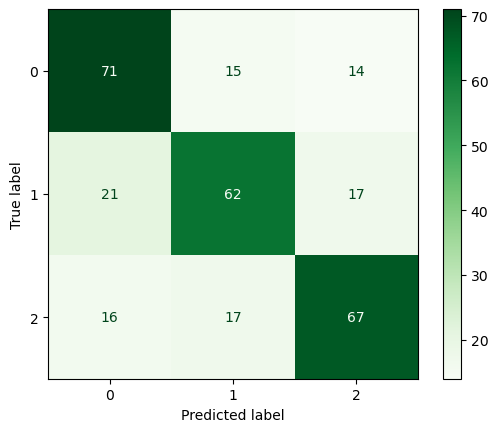

In [2651]:
C = 100  
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(LinearSVC(C=C, random_state=21))
svm_clf.fit(X, y)
y_pred = svm_clf.predict(X)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.show()

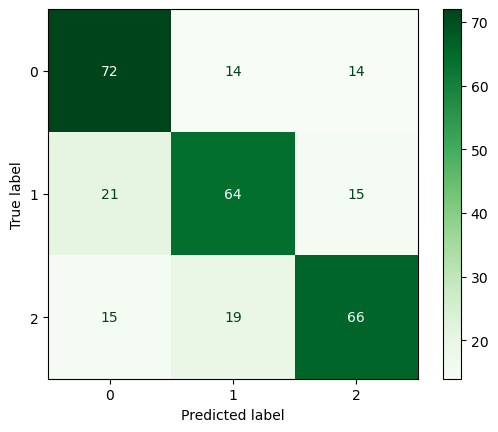

In [2441]:
C = 10
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(LinearSVC(C=C, random_state=21))
svm_clf.fit(X, y)
y_pred = svm_clf.predict(X)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.show()

<h3> Testing best parametres from Train Dataset on Val Dataset</h3>

In [2653]:
X=train_df.drop('CategoryNumber',axis=1).values
y=train_df['CategoryNumber'].values
svm_clf = make_pipeline(LinearSVC(C=10, random_state=21))
svm_clf.fit(X, y)

Pipeline(steps=[('linearsvc', LinearSVC(C=10, random_state=21))])

In [2655]:
X=val_df.drop('CategoryNumber',axis=1).values
y=val_df['CategoryNumber'].values
accuracies = []
precisions = []
recalls = []
f1_scores = []

    

y_pred = svm_clf.predict(X)
    
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)

print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.7333333333333333]
Precisions: [0.7392496392496393]
Recalls: [0.7333333333333333]
F1 Scores: [0.728978428978429]


<h3> Using Grid Search with Predefined Split </h3>

<p> Why predefined split and why not cv?</p>
<p> Because predefined split is useful when you have a specific train-test split that must be preserved during hyp param tuning, often because validation set is derived from a specific Token Number, and we want to keep separate from the training data.</p>

In [2449]:
X_train = train_df.drop('CategoryNumber', axis=1).values
y_train = train_df['CategoryNumber'].values
X_val = val_df.drop('CategoryNumber', axis=1).values
y_val = val_df['CategoryNumber'].values

X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

split_index = [-1] * len(X_train) + [0] * len(X_val)
predefined_split = PredefinedSplit(test_fold=split_index)

model = SVC()  
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': [ 'linear']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=predefined_split, scoring='accuracy')
grid_search.fit(X_combined, y_combined)

print("Best param found:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Val Accuracy: {val_accuracy:.4f}")
print("Val Classification Report:\n", classification_report(y_val, y_val_pred))

Best param found: {'C': 10, 'kernel': 'linear'}
Best cross-val accuracy: 0.7333333333333333
Val Accuracy: 0.7556
Val Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.87      0.83        30
           2       0.70      0.77      0.73        30
           3       0.79      0.63      0.70        30

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.75        90
weighted avg       0.76      0.76      0.75        90



Testing Linear SVC on Test Data to check Best parameters 

In [2470]:
X=train_df.drop('CategoryNumber',axis=1).values
y=train_df['CategoryNumber'].values
svm_clf = make_pipeline(LinearSVC(C=10, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('linearsvc', LinearSVC(C=10, random_state=42))])

In [2657]:
X=test_df.drop('CategoryNumber',axis=1).values
y=test_df['CategoryNumber'].values
accuracies = []
precisions = []
recalls = []
f1_scores = []

    

y_pred = svm_clf.predict(X)
    
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    
accuracies.append(round(accuracy,3))
precisions.append(round(precision,3))
recalls.append(round(recall,3))
f1_scores.append(round(f1,3))

print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.711]
Precisions: [0.713]
Recalls: [0.711]
F1 Scores: [0.71]


<h2>Polynomial</h2>

<h3> Observation on Train Dataset</h3>
<p> It can be observed that when C=0.1,Gamma=10,Degree=3 then we are getting an average accuracy of around 80%. Although we do have more accuracy score for different Hyp param values: for example for C=100, Gamma=10 and Degree=3, the accuracy score is coming to be 90%+
</p>
<table>
  <tr>
    <th>C</th>
    <th>Gamma</th>
    <th>Degree</th>
    <th>Avg Accuracy</th>
    <th>Gen</th>
  </tr>
  <tr>
    <td>100</td>
    <td>100</td>
    <td>3</td>
    <td>95%+</td>
    <td>It will tend to overfit when we run it on Val and Test Dataset</td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>10</td>
    <td>3</td>
    <td>80%</td>
    <td>Better candidate for Val and Test Dataset</td>
  </tr>
  <tr>
    <td>1</td>
    <td>10</td>
    <td>2</td>
    <td>77%</td>
    <td>Better candidate for Val and Test Dataset</td>
  </tr>
</table>

<h3> Score on Val Dataset</h3>
<p> When we use the best param (C=1, Gamma=10, Degree=2) from Train Dataset on Val Dataset, the score has increased to 80% indicating that our model is able to generalise well on the val dataset.</p>

<h3> Score on Test Dataset</h3>
<p> After doing grid search using predefined split and getting the best hyp param for testing the data, we passed these param to test the data, and it have an Accuracy of 72%. Mild Underfitting is observed while running best param on the test data i.e. it might not be able to identify all the patterns.</p>

In [80]:
C_values = [0.1, 1, 10, 100]
gamma_values = [1, 10, 100]
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values


for C in C_values:
    for gamma in gamma_values:
        
        
        svm_clf = SVC(kernel='poly', C=C, degree=2, random_state=21, coef0=0.0, gamma=gamma)
    
        
        svm_clf.fit(X, y)
    
        
        y_pred = svm_clf.predict(X)
    
        
        accuracy = round(accuracy_score(y, y_pred), 3)
        precision = round(precision_score(y, y_pred, average='weighted'), 3)
        recall = round(recall_score(y, y_pred, average='weighted'), 3)
        f1 = round(f1_score(y, y_pred, average='weighted'), 3)
    
        
        print(f"For  C={C}, gamma={gamma}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score: {f1}")

For  C=0.1, gamma=1:
  Accuracy: 0.563
  Precision: 0.613
  Recall: 0.563
  F1 Score: 0.549
For  C=0.1, gamma=10:
  Accuracy: 0.747
  Precision: 0.753
  Recall: 0.747
  F1 Score: 0.746
For  C=0.1, gamma=100:
  Accuracy: 0.84
  Precision: 0.839
  Recall: 0.84
  F1 Score: 0.839
For  C=1, gamma=1:
  Accuracy: 0.673
  Precision: 0.704
  Recall: 0.673
  F1 Score: 0.671
For  C=1, gamma=10:
  Accuracy: 0.797
  Precision: 0.797
  Recall: 0.797
  F1 Score: 0.797
For  C=1, gamma=100:
  Accuracy: 0.863
  Precision: 0.863
  Recall: 0.863
  F1 Score: 0.863
For  C=10, gamma=1:
  Accuracy: 0.747
  Precision: 0.753
  Recall: 0.747
  F1 Score: 0.746
For  C=10, gamma=10:
  Accuracy: 0.84
  Precision: 0.839
  Recall: 0.84
  F1 Score: 0.839
For  C=10, gamma=100:
  Accuracy: 0.887
  Precision: 0.887
  Recall: 0.887
  F1 Score: 0.886
For  C=100, gamma=1:
  Accuracy: 0.797
  Precision: 0.797
  Recall: 0.797
  F1 Score: 0.797
For  C=100, gamma=10:
  Accuracy: 0.863
  Precision: 0.863
  Recall: 0.863
  F1 Scor

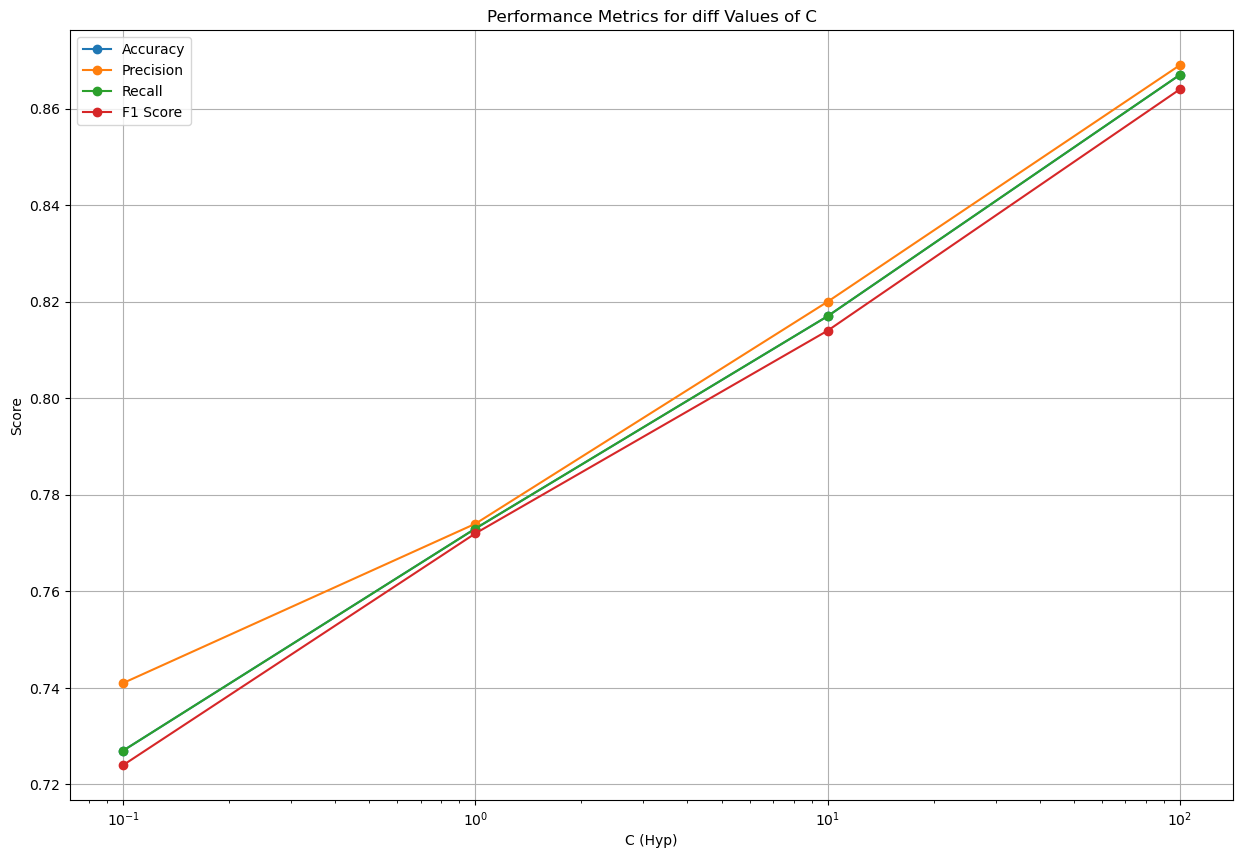

In [2661]:

mp.figure(figsize=(15, 10))


mp.plot(C_values, accuracies, label='Accuracy', marker='o')


mp.plot(C_values, precisions, label='Precision', marker='o')


mp.plot(C_values, recalls, label='Recall', marker='o')


mp.plot(C_values, f1_scores, label='F1 Score', marker='o')


mp.xscale('log')  
mp.xlabel('C (Hyp)')
mp.ylabel('Score')
mp.title('Performance Metrics for diff Values of C')
mp.legend(loc='best')
mp.grid(True)
mp.show()

Evaluating on Validation Set (Poly)

In [2663]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(SVC(kernel='poly', C=1, degree=2,gamma=10, random_state=21))
svm_clf.fit(X, y)

Pipeline(steps=[('svc',
                 SVC(C=1, degree=2, gamma=10, kernel='poly', random_state=21))])

In [2665]:
X = val_df.drop('CategoryNumber', axis=1).values
y = val_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []

    
y_pred = svm_clf.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    

accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.8]
Precisions: [0.8030303030303031]
Recalls: [0.8]
F1 Scores: [0.7971781305114638]


In [2518]:
X_train = train_df.drop('CategoryNumber', axis=1).values
y_train = train_df['CategoryNumber'].values
X_val = val_df.drop('CategoryNumber', axis=1).values
y_val = val_df['CategoryNumber'].values


X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))


model = SVC()  
param_grid = {
    'C': [0.1,1, 10, 100],
    'kernel': ['poly'], 
    'degree': [2,3,4],
    'gamma':[0.1,1,10]
}
split_index = [-1] * len(X_train) + [0] * len(X_val)
predefined_split = PredefinedSplit(test_fold=split_index)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=predefined_split, scoring='accuracy')
grid_search.fit(X_combined, y_combined)


print("Best param from GridSearch:", grid_search.best_params_)
print("Best cross-val score on train data:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Best param from GridSearch: {'C': 1, 'degree': 2, 'gamma': 10, 'kernel': 'poly'}
Best cross-val score on train data: 0.8
Validation Accuracy: 0.8667

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.97      0.92        30
           2       0.81      0.87      0.84        30
           3       0.92      0.77      0.84        30

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



In [2633]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(SVC(kernel='poly', C=1, degree=2,gamma=10, random_state=21))
svm_clf.fit(X, y)

Pipeline(steps=[('svc',
                 SVC(C=1, degree=2, gamma=10, kernel='poly', random_state=21))])

In [2635]:
X = test_df.drop('CategoryNumber', axis=1).values
y = test_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []

    
y_pred = svm_clf.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    

accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1)


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.7222222222222222]
Precisions: [0.7253086419753085]
Recalls: [0.7222222222222222]
F1 Scores: [0.720361509835194]


<h2> RBF</h2>
<h3> Observation on Train Dataset</h3>
<table>
  <tr>
    <th>C</th>
    <th>Gamma</th>
    <th>Avg Accuracy</th>
    <th>Gen</th>
  </tr>
  <tr>
    <td>100</td>
    <td>100</td>
    <td>100%</td>
    <td>It will tend to overfit when we run it on Val and Test Dataset</td>
  </tr>
  <tr>
    <td>1</td>
    <td>10</td>
    <td>80%</td>
    <td>Better candidate for Val and Test Dataset</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.1</td>
    <td>66%</td>
    <td>Not able to identify patterns</td>
  </tr>
  <tr>
    <td>10</td>
    <td>10</td>
    <td>92%</td>
    <td>Better candidate for Val and Test Dataset</td>
  </tr>
</table>

<h3> Score on Val Dataset</h3>
<p> When we use the best param (C=1, Gamma=10, kernel='rbf') from Train Dataset on Val Dataset, the accuracy has come to 76% indicating that our model is  slightly underfitting on the val dataset but able to generalise well on the val dataset. </p>

<h3> Score on Test Dataset</h3>
<p> After doing grid search using predefined split and getting the best hyp param (could be two of them) for testing the data, we passed these param to test the data, and it have an Accuracy of 72%-74%. Mild Underfitting is observed while running best param on the test data</p>
<table>
  <tr>
    <th>C</th>
    <th>Gamma</th>
    <th>Avg Accuracy</th>
  </tr>
  <tr>
    <td>10</td>
    <td>10</td>
    <td>74%</td>
  </tr>
  <tr>
    <td>1</td>
    <td>10</td>
    <td>72%</td>
  </tr>
</table>

In [85]:
C_values = [0.1,1,10,100]
gamma_values = [1,10,100]  

X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values


accuracies = []
precisions = []
recalls = []
f1_scores = []


for C in C_values:
    for gamma in gamma_values:
        svm_clf = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma, random_state=21))
        
        
        svm_clf.fit(X, y)
        
        
        y_pred = svm_clf.predict(X)
        
        
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred,average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        
        
        accuracies.append(round(accuracy,3))
        precisions.append(round(precision,3))
        recalls.append(round(recall,3))
        f1_scores.append(round(f1,3))

        print(f"For  C={C}, gamma={gamma}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score: {f1}")

For  C=0.1, gamma=1:
  Accuracy: 0.6166666666666667
  Precision: 0.6166883819976904
  Recall: 0.6166666666666667
  F1 Score: 0.6166049516535865
For  C=0.1, gamma=10:
  Accuracy: 0.6766666666666666
  Precision: 0.6833333333333333
  Recall: 0.6766666666666666
  F1 Score: 0.6722380332845449
For  C=0.1, gamma=100:
  Accuracy: 0.96
  Precision: 0.9605453418715141
  Recall: 0.96
  F1 Score: 0.959829363668681
For  C=1, gamma=1:
  Accuracy: 0.68
  Precision: 0.6862489362489362
  Recall: 0.68
  F1 Score: 0.6800685958343108
For  C=1, gamma=10:
  Accuracy: 0.8166666666666667
  Precision: 0.8202425860563585
  Recall: 0.8166666666666667
  F1 Score: 0.8168733054305194
For  C=1, gamma=100:
  Accuracy: 0.9866666666666667
  Precision: 0.9868290750643692
  Recall: 0.9866666666666667
  F1 Score: 0.9866991724298059
For  C=10, gamma=1:
  Accuracy: 0.75
  Precision: 0.7500611295947408
  Recall: 0.75
  F1 Score: 0.7497632501144355
For  C=10, gamma=10:
  Accuracy: 0.9366666666666666
  Precision: 0.93694400837

<h3>Val test rbf</h3>

In [2614]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(SVC(kernel='rbf', C=1, gamma=10, random_state=42,probability=True))
svm_clf.fit(X, y)

Pipeline(steps=[('svc', SVC(C=1, gamma=10, probability=True, random_state=42))])

In [2616]:
X = val_df.drop('CategoryNumber', axis=1).values
y = val_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []


y_pred = svm_clf.predict(X)
        
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
        
accuracies.append(round(accuracy,3))
precisions.append(round(precision,3))
recalls.append(round(recall,3))
f1_scores.append(round(f1,3))


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.767]
Precisions: [0.768]
Recalls: [0.767]
F1 Scores: [0.764]


<h3> Grid Search </h3>

In [2560]:
X_train = train_df.drop('CategoryNumber', axis=1).values
y_train = train_df['CategoryNumber'].values
X_val = val_df.drop('CategoryNumber', axis=1).values
y_val = val_df['CategoryNumber'].values


X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))


split_index = [-1] * len(X_train) + [0] * len(X_val)
predefined_split = PredefinedSplit(test_fold=split_index)


model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [0.1, 1,10,100]  
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=predefined_split, scoring='accuracy')
grid_search.fit(X_combined, y_combined)


print("Best parameters found:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Best parameters found: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.7666666666666667
Validation Accuracy: 0.8778

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.83      1.00      0.91        30
           2       0.86      0.80      0.83        30
           3       0.96      0.83      0.89        30

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [2628]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
svm_clf = make_pipeline(SVC(kernel='rbf', C=1, gamma=10, random_state=21,probability=True))
svm_clf.fit(X, y)

Pipeline(steps=[('svc', SVC(C=1, gamma=10, probability=True, random_state=21))])

In [2630]:
X = test_df.drop('CategoryNumber', axis=1).values
y = test_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []


y_pred = svm_clf.predict(X)
        
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
        
        
accuracies.append(round(accuracy,3))
precisions.append(round(precision,3))
recalls.append(round(recall,3))
f1_scores.append(round(f1,3))


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.722]
Precisions: [0.725]
Recalls: [0.722]
F1 Scores: [0.721]


<h2>Softmax </h2> 
<h3> 4 (a)</h3>
<h3> Observation on Train Dataset</h3>
<p> Out of all the param passed for model training Solver=lbfgs, C=100 and max_iter=150 or even max_iter=100, we are getting Accuracy of 67%.</p>
<h3> Score on Val Dataset</h3>
<p> When we use the param (C=100, max_iter=150, solver=lbfgs) from Train Dataset on Val Dataset, the accuracy has come to 74% indicating that our model is able to generalise well on the val dataset. </p>

<h3> Score on Test Dataset</h3>
<p> After doing grid search using predefined split and getting the best hyp param (C=100, max_iter=150, solver=lbfgs) for testing the data, we passed these param to test the data, and it have an Accuracy of 68%. Mild Underfitting is observed while running best param on the test data</p>

<h3> Discussion on the impact Hyperparam</h3>
<p> We observed that when we passed a range of C values to the training model starting from 1 to 100 then for C=1, the accuracy was coming to be 65%, although when C=100 the accuracy increased to 67% not much change but still we can say that it's better because using C=100 on Val dataset had an accuracy of 74% which means having a strict decision boundary (less regularisation though) we are able to acheive more accuracy and less data violations. When we run this on Test Dataset the accuracy dropped 68% i.e. Mild Underfitting. So, we tried passing C=1 and max_iter=100 then the Accuracy increased to 72%. So, while creating an ensemble we need to try tuning these param to get max Accuracy. </p>

In [2693]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values


C_values = [1, 10, 100]
Solver_S =['newton-cg', 'lbfgs'] 
max_it = [100,150]


accuracies = []
precisions = []
recalls = []
f1_scores = []


for C in C_values:
    for Solver in Solver_S:
        for max_iter in max_it:
            softmax_reg = LogisticRegression(multi_class='multinomial', solver=Solver, C=C, max_iter=max_iter, random_state=21)
            softmax_reg.fit(X, y)
            y_pred = softmax_reg.predict(X)
    
    
            accuracy = accuracy_score(y, y_pred)
            precision = precision_score(y, y_pred, average='weighted')
            recall = recall_score(y, y_pred, average='weighted')
            f1 = f1_score(y, y_pred, average='weighted')
    
   
            accuracies.append(round(accuracy,3))
            precisions.append(round(precision,3))
            recalls.append(round(recall,3))

            
            print(f"For C={C}, Solver={Solver}, max_iter={max_iter}:")
            print(f"  Accuracy: {round(accuracy, 3)}, Precision: {round(precision, 3)}, Recall: {round(recall, 3)}, F1 Score: {round(f1, 3)}")
            print("")

For C=1, Solver=newton-cg, max_iter=100:
  Accuracy: 0.65, Precision: 0.65, Recall: 0.65, F1 Score: 0.65

For C=1, Solver=newton-cg, max_iter=150:
  Accuracy: 0.65, Precision: 0.65, Recall: 0.65, F1 Score: 0.65

For C=1, Solver=lbfgs, max_iter=100:
  Accuracy: 0.647, Precision: 0.647, Recall: 0.647, F1 Score: 0.647

For C=1, Solver=lbfgs, max_iter=150:
  Accuracy: 0.647, Precision: 0.647, Recall: 0.647, F1 Score: 0.647

For C=10, Solver=newton-cg, max_iter=100:
  Accuracy: 0.65, Precision: 0.651, Recall: 0.65, F1 Score: 0.65

For C=10, Solver=newton-cg, max_iter=150:
  Accuracy: 0.65, Precision: 0.651, Recall: 0.65, F1 Score: 0.65

For C=10, Solver=lbfgs, max_iter=100:
  Accuracy: 0.653, Precision: 0.654, Recall: 0.653, F1 Score: 0.654

For C=10, Solver=lbfgs, max_iter=150:
  Accuracy: 0.653, Precision: 0.654, Recall: 0.653, F1 Score: 0.654

For C=100, Solver=newton-cg, max_iter=100:
  Accuracy: 0.67, Precision: 0.671, Recall: 0.67, F1 Score: 0.67

For C=100, Solver=newton-cg, max_iter

In [2736]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=100, max_iter=150, random_state=21)
softmax_reg.fit(X, y)

LogisticRegression(C=100, max_iter=150, multi_class='multinomial',
                   random_state=21)

In [2738]:
X = val_df.drop('CategoryNumber', axis=1).values
y = val_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []


y_pred = softmax_reg.predict(X)
    

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    

accuracies.append(round(accuracy,3))
precisions.append(round(precision,3))
recalls.append(round(recall,3))
f1_scores.append(round(f1,3))


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.744]
Precisions: [0.75]
Recalls: [0.744]
F1 Scores: [0.743]


In [2706]:
X_train = train_df.drop('CategoryNumber', axis=1).values
y_train = train_df['CategoryNumber'].values
X_val = val_df.drop('CategoryNumber', axis=1).values
y_val = val_df['CategoryNumber'].values


X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))


split_index = [-1] * len(X_train) + [0] * len(X_val)
predefined_split = PredefinedSplit(test_fold=split_index)


param_grid = {
    'C': [0.1,1,100],           
    'solver': ['newton-cg', 'lbfgs', 'saga'] ,
    'max_iter':[100,150,200]
}


softmax_model = LogisticRegression(multi_class='multinomial', random_state=21, max_iter=max_iter,C=C)


grid_search = GridSearchCV(softmax_model, param_grid, cv=predefined_split, scoring='accuracy')
grid_search.fit(X_combined, y_combined)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.7444444444444445


In [2728]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values
softmax_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=1, max_iter=100, random_state=21)
softmax_reg.fit(X, y)

LogisticRegression(C=1, multi_class='multinomial', random_state=21,
                   solver='newton-cg')

In [2730]:
X = test_df.drop('CategoryNumber', axis=1).values
y = test_df['CategoryNumber'].values

accuracies = []
precisions = []
recalls = []
f1_scores = []


y_pred = softmax_reg.predict(X)
    

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')
    

accuracies.append(round(accuracy,3))
precisions.append(round(precision,3))
recalls.append(round(recall,3))
f1_scores.append(round(f1,3))


print("Accuracies:", accuracies)
print("Precisions:", precisions)
print("Recalls:", recalls)
print("F1 Scores:", f1_scores)

Accuracies: [0.722]
Precisions: [0.735]
Recalls: [0.722]
F1 Scores: [0.723]


<h2>Random Forest </h2> 

<h3> 4 (c)</h3>
<h3> Feature Importance</h3>
<p> Here we've used feature_importances_ function to check the important features in the dataset, it's results are kind of matching with what we did in PCC correlation i.e. Physical Layers correlation was coming to highest and here also it is the most important feature. </p>

<h3> Observation on Train Dataset</h3>
<p> We've tried various combinations for parametres on the training dataset and checked the Accuracy corresponding to each combination and took the combinations that were giving good results (>70% Accuracy). For n=100, depth=6 , split=10 and leaf nodes=5 we were getting max accuracy. Although Grid Search results for best param were different from this but we tried both the options on val and test set.</p>

<h3> Score on Val Dataset</h3>
<p> When we tried n=100, depth=6 , split=10 and leaf nodes=5 we were getting val accuracy of 72% and when we tried n=6, depth=10 , split=20 and leaf nodes=9 (Grid Search) we were getting accuracy of 67%. Mild underfitting and we can observe that having more estimators and more sample splits is giving better results. </p>

<h3> Score on Test Dataset</h3>
<p> After getting best param i.e. n=100, depth=6 , split=10 and leaf nodes=5 we were getting Test Accuracy of 72%. </p>

<h3> Discussion on the impact Hyperparam</h3>
<p> When we tried n=100, depth=6 , split=10 and leaf nodes=5 we were getting val accuracy of 72% and when we tried n=6, depth=10 , split=20 and leaf nodes=9 (Grid Search) we were getting accuracy of 67%. Mild underfitting and we can observe that having more estimators and larger sample splits is giving better results.  </p>

In [2122]:
X = train_df.drop('CategoryNumber', axis=1)
y = train_df['CategoryNumber']


rf_model = RandomForestClassifier(random_state=21)
rf_model.fit(X, y)


feature_importances = rf_model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                       Feature  Importance
4              Physical_Layers    0.149447
7                     Splotchy    0.135307
10               Sandy_Texture    0.130596
6                         Oily    0.109386
5                        Veins    0.089318
0             AngularFragments    0.089142
1             RoundedFragments    0.075986
2             Straight_Stripes    0.068250
8   Single_Translucent_Crystal    0.060496
3               Curved_Stripes    0.051914
9      Multiple_Cubic_Crystals    0.040157


In [2743]:
X = train_df.drop('CategoryNumber', axis=1).values
y = train_df['CategoryNumber'].values

n_estimators_values = [9, 50, 100] 
max_depth_values = [6, 10, 15]
min_samples_split_values = [10, 20, 30]
min_samples_leaf_values = [5, 10, 15]

accuracies = []
precisions = []
recalls = []
f1_scores = []

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                
                
                rf_model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=21
                )
                
                
                rf_model.fit(X, y)
                
                
                y_pred = rf_model.predict(X)
                
                
                accuracy = accuracy_score(y, y_pred)
                precision = precision_score(y, y_pred, average='weighted')
                recall = recall_score(y, y_pred, average='weighted')
                f1 = f1_score(y, y_pred, average='weighted')
                
                
                accuracies.append(round(accuracy, 3))
                precisions.append(round(precision, 3))
                recalls.append(round(recall, 3))
                f1_scores.append(round(f1, 3))
                
                print(f"For n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
                print(f"  Accuracy-> {round(accuracy, 3)}, Precision-> {round(precision, 3)}, Recall-> {round(recall, 3)}, F1 Score-> {round(f1, 3)}\n")
                

For n_estimators=9, max_depth=6, min_samples_split=10, min_samples_leaf=5
  Accuracy-> 0.75, Precision-> 0.766, Recall-> 0.75, F1 Score-> 0.751

For n_estimators=9, max_depth=6, min_samples_split=10, min_samples_leaf=10
  Accuracy-> 0.667, Precision-> 0.68, Recall-> 0.667, F1 Score-> 0.664

For n_estimators=9, max_depth=6, min_samples_split=10, min_samples_leaf=15
  Accuracy-> 0.63, Precision-> 0.634, Recall-> 0.63, F1 Score-> 0.625

For n_estimators=9, max_depth=6, min_samples_split=20, min_samples_leaf=5
  Accuracy-> 0.743, Precision-> 0.754, Recall-> 0.743, F1 Score-> 0.744

For n_estimators=9, max_depth=6, min_samples_split=20, min_samples_leaf=10
  Accuracy-> 0.667, Precision-> 0.68, Recall-> 0.667, F1 Score-> 0.664

For n_estimators=9, max_depth=6, min_samples_split=20, min_samples_leaf=15
  Accuracy-> 0.63, Precision-> 0.634, Recall-> 0.63, F1 Score-> 0.625

For n_estimators=9, max_depth=6, min_samples_split=30, min_samples_leaf=5
  Accuracy-> 0.727, Precision-> 0.74, Recall-> 0

In [2831]:
X_train = train_df.drop('CategoryNumber', axis=1).values
y_train = train_df['CategoryNumber'].values
X_val = val_df.drop('CategoryNumber', axis=1).values
y_val = val_df['CategoryNumber'].values


X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))


split_index = [-1] * len(X_train) + [0] * len(X_val)
predefined_split = PredefinedSplit(test_fold=split_index)

param_grid = {
    'n_estimators': [3, 6, 9, 12],       
    'max_depth': [2, 3, 4, 5, 6],       
    'min_samples_split': [20, 40, 60],           
    'min_samples_leaf': [10, 15, 20]              
}


rf_model = RandomForestClassifier(random_state=21)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=predefined_split, scoring='accuracy')
grid_search.fit(X_combined, y_combined)


print("Best parm found:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

Best parm found: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 9}
Best cross-val accuracy: 0.6555555555555556


In [2867]:
X = train_df.drop('CategoryNumber', axis=1)
y = train_df['CategoryNumber']

rf_model = RandomForestClassifier(n_estimators=6, random_state=21,max_depth=10,min_samples_split=20,min_samples_leaf=9)
rf_model.fit(X, y)

RandomForestClassifier(max_depth=10, min_samples_leaf=9, min_samples_split=20,
                       n_estimators=6, random_state=21)

In [2869]:
X = val_df.drop('CategoryNumber', axis=1)
y = val_df['CategoryNumber']

y_pred = rf_model.predict(X)


accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))


Accuracy: 0.6778

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.64      0.70      0.67        30
           3       0.63      0.57      0.60        30

    accuracy                           0.68        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.68      0.68      0.68        90



In [2875]:
X = train_df.drop('CategoryNumber', axis=1)
y = train_df['CategoryNumber']


rf_model = RandomForestClassifier(n_estimators=100, random_state=21,max_depth=6,min_samples_split=10,min_samples_leaf=5)
rf_model.fit(X, y)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=21)

In [2877]:
X = test_df.drop('CategoryNumber', axis=1)
y = test_df['CategoryNumber']


y_pred = rf_model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 0.7222

Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.71      0.67      0.69        30
           3       0.69      0.73      0.71        30

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



<h2> Question 5></h2>
<h3> Ensemble </h3>
<p> Till now we've trained Linear SVC, Polynomial SVC, RBF, Softmax, Random Forest Classification Models separately on Train, Val and Test Data. Now we'll be combining these models into an ensemble with the best param for each model and then running it on Val and Test data.  </p>

<p> <i>For Val data the ensemble is giving an accuracy of 80% after voting='soft' and on test data it is giving an accuracy of 91% which is greater than the individual classification model </i> which means our ensemble is able to generalise well on the test data.</p>

<p> We can also increase the accuracy for Ensemble further by following ways:</p>
<p> 1. By tuning the hyperparametres in the ensemble itself. </p>
<p> 2. By running the ensemble first on train data, and then val and test data.</p>
<p> 3. By reducing the impact of low accuracy model such as Sofmax in the ensemble.</p>

In [121]:
X = train_df.drop('CategoryNumber', axis=1)
y = train_df['CategoryNumber']


linear_svc = SVC(kernel='linear', C=10, probability=True, random_state=21)
poly_svc = SVC(kernel='poly', C=1, degree=2, probability=True, random_state=21,gamma=10)
softmax = LogisticRegression(multi_class='multinomial', C=1, solver='lbfgs', random_state=21,max_iter=100)
random_forest = RandomForestClassifier(n_estimators=100, random_state=21,max_depth=6,min_samples_split=10,min_samples_leaf=5)
rbf_svc = SVC(kernel='rbf', C=1, gamma=10, probability=True, random_state=21)

ensemble_model = VotingClassifier(
    estimators=[
        ('linear_svc', linear_svc),
        ('poly_svc', poly_svc),
        ('softmax', softmax),
        ('rbf_svc', rbf_svc),
        ('random_forest',random_forest)
    ],
    voting='soft'  
)


ensemble_model.fit(X, y)

y_pred = ensemble_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.7867


In [123]:
X = val_df.drop('CategoryNumber', axis=1)
y = val_df['CategoryNumber']


y_pred = ensemble_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.8000


In [129]:
X = test_df.drop('CategoryNumber', axis=1)
y = test_df['CategoryNumber']

y_pred = ensemble_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.9111


<h2> Question 6></h2>
<h3> Part 1</h3>

In [ ]:
Human Trial Data

In [186]:
df_trial=pd.read_csv("/Users/hoosiersaikap251/Desktop/Sem1/Applied Machine Learning/Homework2/trialData.csv")
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88547 entries, 0 to 88546
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subid        88547 non-null  object 
 1   block        88547 non-null  int64  
 2   trial        88547 non-null  int64  
 3   rocknumber   88547 non-null  int64  
 4   category     88547 non-null  object 
 5   subtype      88547 non-null  object 
 6   token        88547 non-null  int64  
 7   type         88547 non-null  object 
 8   catresponse  88547 non-null  object 
 9   recresponse  44274 non-null  object 
 10  cat_correct  88547 non-null  int64  
 11  rec_correct  44274 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 8.1+ MB


In [188]:
df_trial=df_trial.loc[(df_trial['rocknumber']>=1) & (df_trial['rocknumber']<=480)]
li=[1,2,3]
df_trial_train=df_trial.loc[df_trial['block'].isin(li)]
df_trial_test=df_trial.loc[df_trial['block']==4]

In [1715]:
df_trial_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44273 entries, 0 to 88006
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subid        44273 non-null  object 
 1   block        44273 non-null  int64  
 2   trial        44273 non-null  int64  
 3   rocknumber   44273 non-null  int64  
 4   category     44273 non-null  object 
 5   subtype      44273 non-null  object 
 6   token        44273 non-null  int64  
 7   type         44273 non-null  object 
 8   catresponse  44273 non-null  object 
 9   recresponse  0 non-null      object 
 10  cat_correct  44273 non-null  int64  
 11  rec_correct  0 non-null      float64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.4+ MB


<h3> Human Accuracy on Train and Test Data </h3>

In [2224]:
Trial_Train_Accuracy = df_trial_train['cat_correct'].mean()
Trial_Test_Accuracy = df_trial_test['cat_correct'].mean()
print("Training Accuracy:", Trial_Train_Accuracy)
print("Testing Accuracy:", Trial_Test_Accuracy)

Training Accuracy: 0.5599349490660221
Testing Accuracy: 0.5984143924378716


In [190]:
category_stats = df_trial.groupby(['category','rocknumber'])['cat_correct'].agg(['mean', 'std']).reset_index()
category_stats.columns = ['Category', 'RockNumber', 'Avg_Human_Accuracy', 'Std_Human_Accuracy']
category_stats

,Category,RockNumber,Avg_Human_Accuracy,Std_Human_Accuracy
0,Igneous,1,0.746951,0.435423
1,Igneous,2,0.719512,0.452002
2,Igneous,3,0.451220,0.500677
3,Igneous,4,0.500000,0.503077
4,Igneous,5,0.512195,0.502927
...,...,...,...,...
475,Sedimentary,476,0.576220,0.494911
476,Sedimentary,477,0.524390,0.502478
477,Sedimentary,478,0.426829,0.497661
478,Sedimentary,479,0.365854,0.484633


<p> For Model Accuracy we're using Predict prob function to calculate prob of classes. We are using the dataframe before splitting the data into Train-Test split, to include all the Rock Numbers. </p>

In [152]:
li=['RockNumber','SubTypeNumber_F','TokenNumber']
df_Final_Model=df_merged.drop(columns=li)
df_Final_Model

,AngularFragments,RoundedFragments,Straight_Stripes,Curved_Stripes,Physical_Layers,Veins,Oily,Splotchy,Single_Translucent_Crystal,Multiple_Cubic_Crystals,Sandy_Texture,CategoryNumber
0,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10,1
1,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05,1
2,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05,1
3,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10,1
4,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30,3
476,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35,3
477,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20,3
478,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20,3


In [162]:
X = df_Final_Model.drop('CategoryNumber', axis=1)
y = df_Final_Model['CategoryNumber']

y_pred = ensemble_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.7812


<h3>Compare to the accuracy of your best model.</h3>
<p> Human Accuracy on Test and Train data was coming to be around 55-59% whereas Model Accuracy of Ensemble is 79% which is clearly greater than Human Accuracy.</p>

<h3> Getting Model Probalities for each class using predict proba function</h3>
<p> Using Predict_Proba function, we've calculated the Probality of each class and getting True lable y in dataframe df_probs. Now, corresponding to true label, we will be getting Prob from one of these 3 class probs, for example if True lable is 1 then we will use prob from Class_0_Prob, if True lable is 2 then we will take prob from class 2 column.</p>

In [176]:
X = df_Final_Model.drop('CategoryNumber', axis=1)
y = df_Final_Model['CategoryNumber']


y_proba = ensemble_model.predict_proba(X)  


df_probs = pd.DataFrame({
    'RockNumber': df_Final_Model.index + 1,
    'Class_0_Prob': y_proba[:, 0],  
    'Class_1_Prob': y_proba[:, 1],  
    'Class_2_Prob': y_proba[:, 2], 
    'True_Label': y,  
}) 
df_probs

,RockNumber,Class_0_Prob,Class_1_Prob,Class_2_Prob,True_Label
0,1,0.750018,0.159074,0.090908,1
1,2,0.687465,0.060575,0.251960,1
2,3,0.801501,0.096830,0.101669,1
3,4,0.289078,0.082496,0.628427,1
4,5,0.485560,0.076599,0.437840,1
...,...,...,...,...,...
475,476,0.052280,0.164379,0.783341,3
476,477,0.138868,0.132505,0.728627,3
477,478,0.103375,0.283650,0.612975,3
478,479,0.093397,0.290172,0.616431,3


<h2> Question 6 Part2 </h2>
<p> In Category_Stats table, we've calculated Avg Human Accuracy and Standard Deviation for each Rock Number from 1-480, and along with that using Predict Proba function we've calculated Prob of each Rock Number in df_probs dataframe.</p>

In [192]:
category_stats

,Category,RockNumber,Avg_Human_Accuracy,Std_Human_Accuracy
0,Igneous,1,0.746951,0.435423
1,Igneous,2,0.719512,0.452002
2,Igneous,3,0.451220,0.500677
3,Igneous,4,0.500000,0.503077
4,Igneous,5,0.512195,0.502927
...,...,...,...,...
475,Sedimentary,476,0.576220,0.494911
476,Sedimentary,477,0.524390,0.502478
477,Sedimentary,478,0.426829,0.497661
478,Sedimentary,479,0.365854,0.484633


In [178]:
df_probs

,RockNumber,Class_0_Prob,Class_1_Prob,Class_2_Prob,True_Label
0,1,0.750018,0.159074,0.090908,1
1,2,0.687465,0.060575,0.251960,1
2,3,0.801501,0.096830,0.101669,1
3,4,0.289078,0.082496,0.628427,1
4,5,0.485560,0.076599,0.437840,1
...,...,...,...,...,...
475,476,0.052280,0.164379,0.783341,3
476,477,0.138868,0.132505,0.728627,3
477,478,0.103375,0.283650,0.612975,3
478,479,0.093397,0.290172,0.616431,3


In [198]:
df_probs['Final_Prob'] = df_probs.apply(
    lambda row: row['Class_0_Prob'] if row['True_Label'] == 1 else 
                row['Class_1_Prob'] if row['True_Label'] == 2 else 
                row['Class_2_Prob'],
    axis=1
)

In [208]:
df_probs_final=df_probs[['RockNumber','Final_Prob']]
df_probs_final

,RockNumber,Final_Prob
0,1,0.750018
1,2,0.687465
2,3,0.801501
3,4,0.289078
4,5,0.485560
...,...,...
475,476,0.783341
476,477,0.728627
477,478,0.612975
478,479,0.616431


In [210]:
comb = pd.merge(category_stats, df_probs_final, on='RockNumber')
comb

,Category,RockNumber,Avg_Human_Accuracy,Std_Human_Accuracy,Final_Prob
0,Igneous,1,0.746951,0.435423,0.750018
1,Igneous,2,0.719512,0.452002,0.687465
2,Igneous,3,0.451220,0.500677,0.801501
3,Igneous,4,0.500000,0.503077,0.289078
4,Igneous,5,0.512195,0.502927,0.485560
...,...,...,...,...,...
475,Sedimentary,476,0.576220,0.494911,0.783341
476,Sedimentary,477,0.524390,0.502478,0.728627
477,Sedimentary,478,0.426829,0.497661,0.612975
478,Sedimentary,479,0.365854,0.484633,0.616431


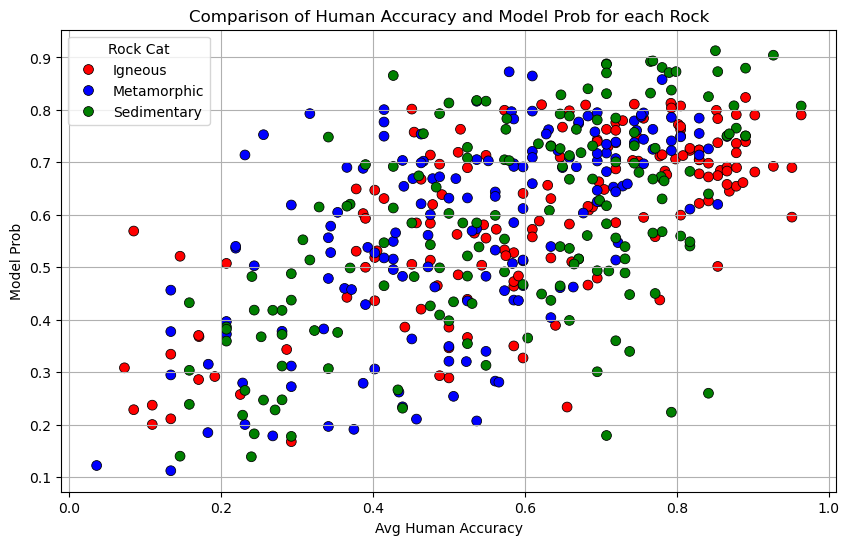

In [222]:
custom = {
    'Igneous': 'red',
    'Metamorphic': 'blue',
    'Sedimentary': 'green'
}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comb,
    x='Avg_Human_Accuracy',    
    y='Final_Prob',            
    hue='Category',            
    palette=custom,         
    s=50,                      
    edgecolor='k',   
)

plt.xlabel('Avg Human Accuracy')
plt.ylabel('Model Prob')
plt.title('Comparison of Human Accuracy and Model Prob for each Rock')
plt.legend(title='Rock Cat')
plt.grid(True)
plt.show()

In [224]:
comb

,Category,RockNumber,Avg_Human_Accuracy,Std_Human_Accuracy,Final_Prob
0,Igneous,1,0.746951,0.435423,0.750018
1,Igneous,2,0.719512,0.452002,0.687465
2,Igneous,3,0.451220,0.500677,0.801501
3,Igneous,4,0.500000,0.503077,0.289078
4,Igneous,5,0.512195,0.502927,0.485560
...,...,...,...,...,...
475,Sedimentary,476,0.576220,0.494911,0.783341
476,Sedimentary,477,0.524390,0.502478,0.728627
477,Sedimentary,478,0.426829,0.497661,0.612975
478,Sedimentary,479,0.365854,0.484633,0.616431


In [230]:
correlations = {}

for category in comb['Category'].unique():
    
    category_data = comb[comb['Category'] == category]
    
    
    corr, p_value = pearsonr(category_data['Avg_Human_Accuracy'], category_data['Final_Prob'])
    correlations[category] = {'Correlation': corr, 'P-Value': p_value}


overall_corr, overall_p_value = pearsonr(comb['Avg_Human_Accuracy'], comb['Final_Prob'])
correlations['All_Rocks'] = {'Correlation': overall_corr, 'P-Value': overall_p_value}

for key, value in correlations.items():
    print(f"{key}: Correlation = {value['Correlation']:.4f}, P-Value = {value['P-Value']:.4e}")

Igneous: Correlation = 0.6849, P-Value = 1.7446e-23
Metamorphic: Correlation = 0.5978, P-Value = 7.0631e-17
Sedimentary: Correlation = 0.5812, P-Value = 7.7313e-16
All_Rocks: Correlation = 0.6120, P-Value = 1.1448e-50


<h2> Question 6. Part 3 </h2>

<h3> Breaking down and numbers</h3>

<p> After merging the Avg Human Accuracy and Model prob for rocks 1-480 in a single dataframe. We'll be checking the co-relation and p-value.</p>

<p>
    1. Correlation: The correlation value shows how strongly two things are related.
    -> Positive Correlation (like Metamorphic = 0.5978, Sedimentary=0.5812 and Igneous=0.6849) suggests a positive relationship—when one value increases, the other tends to increase as well.
</p>

<p>-> Metamorphic Rocks: The correlation for metamorphic rocks is positive (0.5978) and has a very small p-value (7.0631e-17), meaning this relationship is statistically significant. This suggests that there’s a reliable positive relationship in the data for metamorphic rocks, which may help both humans and models recognize patterns for metamorphic rocks more easily.</p>

<p>-> Igneous Rocks: The correlation for igneous rock is positive (0.6849) and has a very small p-value (1.7446e-23), meaning this relationship is statistically significant. This suggests that there’s a reliable positive relationship in the data for igneous rock, which may help both humans and models recognize patterns for igneous rocks more easily.</p>

<p>-> Sedimentary Rocks: The correlation for sedimentary rock is positive (0.5812) and has a very small p-value (7.7313e-163), meaning this relationship is statistically significant. This suggests that there’s a reliable positive relationship in the data for sedimentary rock, which may help both humans and models recognize patterns for sedimentary rocks more easily. </p>

<h3> Conclusion</h3>
<p> For all rocks, we have correlation of 0.6120 and small p-value of 1.1448e-50, meaning this relationship is statistically significant. It means the for this given dataset both human and model will be able to identify all the types of rocks. </p>